# Project # 1

# Happy Customers 

# Background and Problem Statement

ACME is one of the fastest growing startups in the logistics and delivery domain. The company works with several partners and make on-demand delivery to customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

One of ACME's goals is making their customers happy. As a growing startup, with a global expansion strategy the company  has determined that it is necessary to measure how happy each customer is. If the company can predict what makes their customers happy or unhappy, then necessary actions can be taken to ensure that customers remain happy with the service.



# Project Objectives

The aim of this project is to use the results of a customer survey to predict if a customer is happy or not based on the answers they give to questions asked.

The success metrics that will be used for this project will be Accuracy. The objective will be to find a solution that gives an accuracy of 73% or above.

We will use the insights and  the results from the machine learning algorithms to determine which questions in the survey are most important to predicting the customer's happiness and which can be removed in the next survey.


# Libraries imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import scikitplot as skplt
from matplotlib.colors import ListedColormap 

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC



# The Data

The project was carried out using the data from the Happiness Survey carried out by the company in 2020. The data consists of 126 rows and 7 columns. One column is the target column that indiactes whether a customer was happy or not and the other 6 columns represents the responses to the questions asked in the survey. Refer to the data dictionary for more details on the infromation given in each column.

In [2]:
survey = pd.read_csv(r'C:\Users\verph\OneDrive\Documents\AP - Projects\ACME-HappinessSurvey2020.csv')

In [3]:
survey.shape

(126, 7)

In [4]:
survey.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [5]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [6]:
survey.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
survey['X1'].unique()

array([3, 5, 4, 1], dtype=int64)

In [8]:
survey['X2'].unique()

array([3, 2, 4, 5, 1], dtype=int64)

In [9]:
survey['X3'].unique()

array([3, 2, 4, 5, 1], dtype=int64)

In [10]:
survey['X4'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [11]:
survey['X5'].unique()

array([2, 4, 3, 5, 1], dtype=int64)

In [12]:
survey['X6'].unique()

array([4, 3, 5, 2, 1], dtype=int64)

A review of the data set revealed that the data is quite clean. There are no missing values and no feature engineering is considered necessary to predict if a customer is happy or not based on the answers they give to questions asked.

# Data Dictionary

Y  - Target attribute which indicates whether a customer is happy or not. 
     This has two values:  
     Unhappy Customer - 0
     Happy Customer - 1 
     
X1 - This indicates whether an order was delivered on time
     The values range from 1 to 5.
     Item not delivered on time - 1
     Item delivered on time  - 5
     Range 2 -4 indicating the service falling between the two levels.
     
X2 - This indicates whether the contents of the order was as expected
     The values range from 1 to 5.
     Item not delivered on time - 1
     Item delivered on time  - 5
     Range 2 -4 indicating the service falling between the two levels.

X3 - This indicates whether the customer ordered everything they wanted to order
     The values range from 1 to 5.
     Item not delivered on time - 1
     Item delivered on time  - 5
     Range 2 -4 indicating the service falling between the two levels.
     
X4 - This indicates whether the customer paid a good price for the order
     The values range from 1 to 5.
     Item not delivered on time - 1
     Item delivered on time  - 5
     Range 2 -4 indicating the service falling between the two levels.

X5 - This indicates whether the customer is satisfied with the courier.
     The values range from 1 to 5.
     Item not delivered on time - 1
     Item delivered on time  - 5
     Range 2 -4 indicating the service falling between the two levels

X6 - This indicates whether the app makes ordering easy for the customer
     The values range from 1 to 5.
     Item not delivered on time - 1
     Item delivered on time  - 5
     Range 2 -4 indicating the service falling between the two levels


In [13]:
#Baseline : 0 - Unhappy, 1- happy
survey.Y.value_counts(normalize=True)

1    0.547619
0    0.452381
Name: Y, dtype: float64

# Visualizing the Data

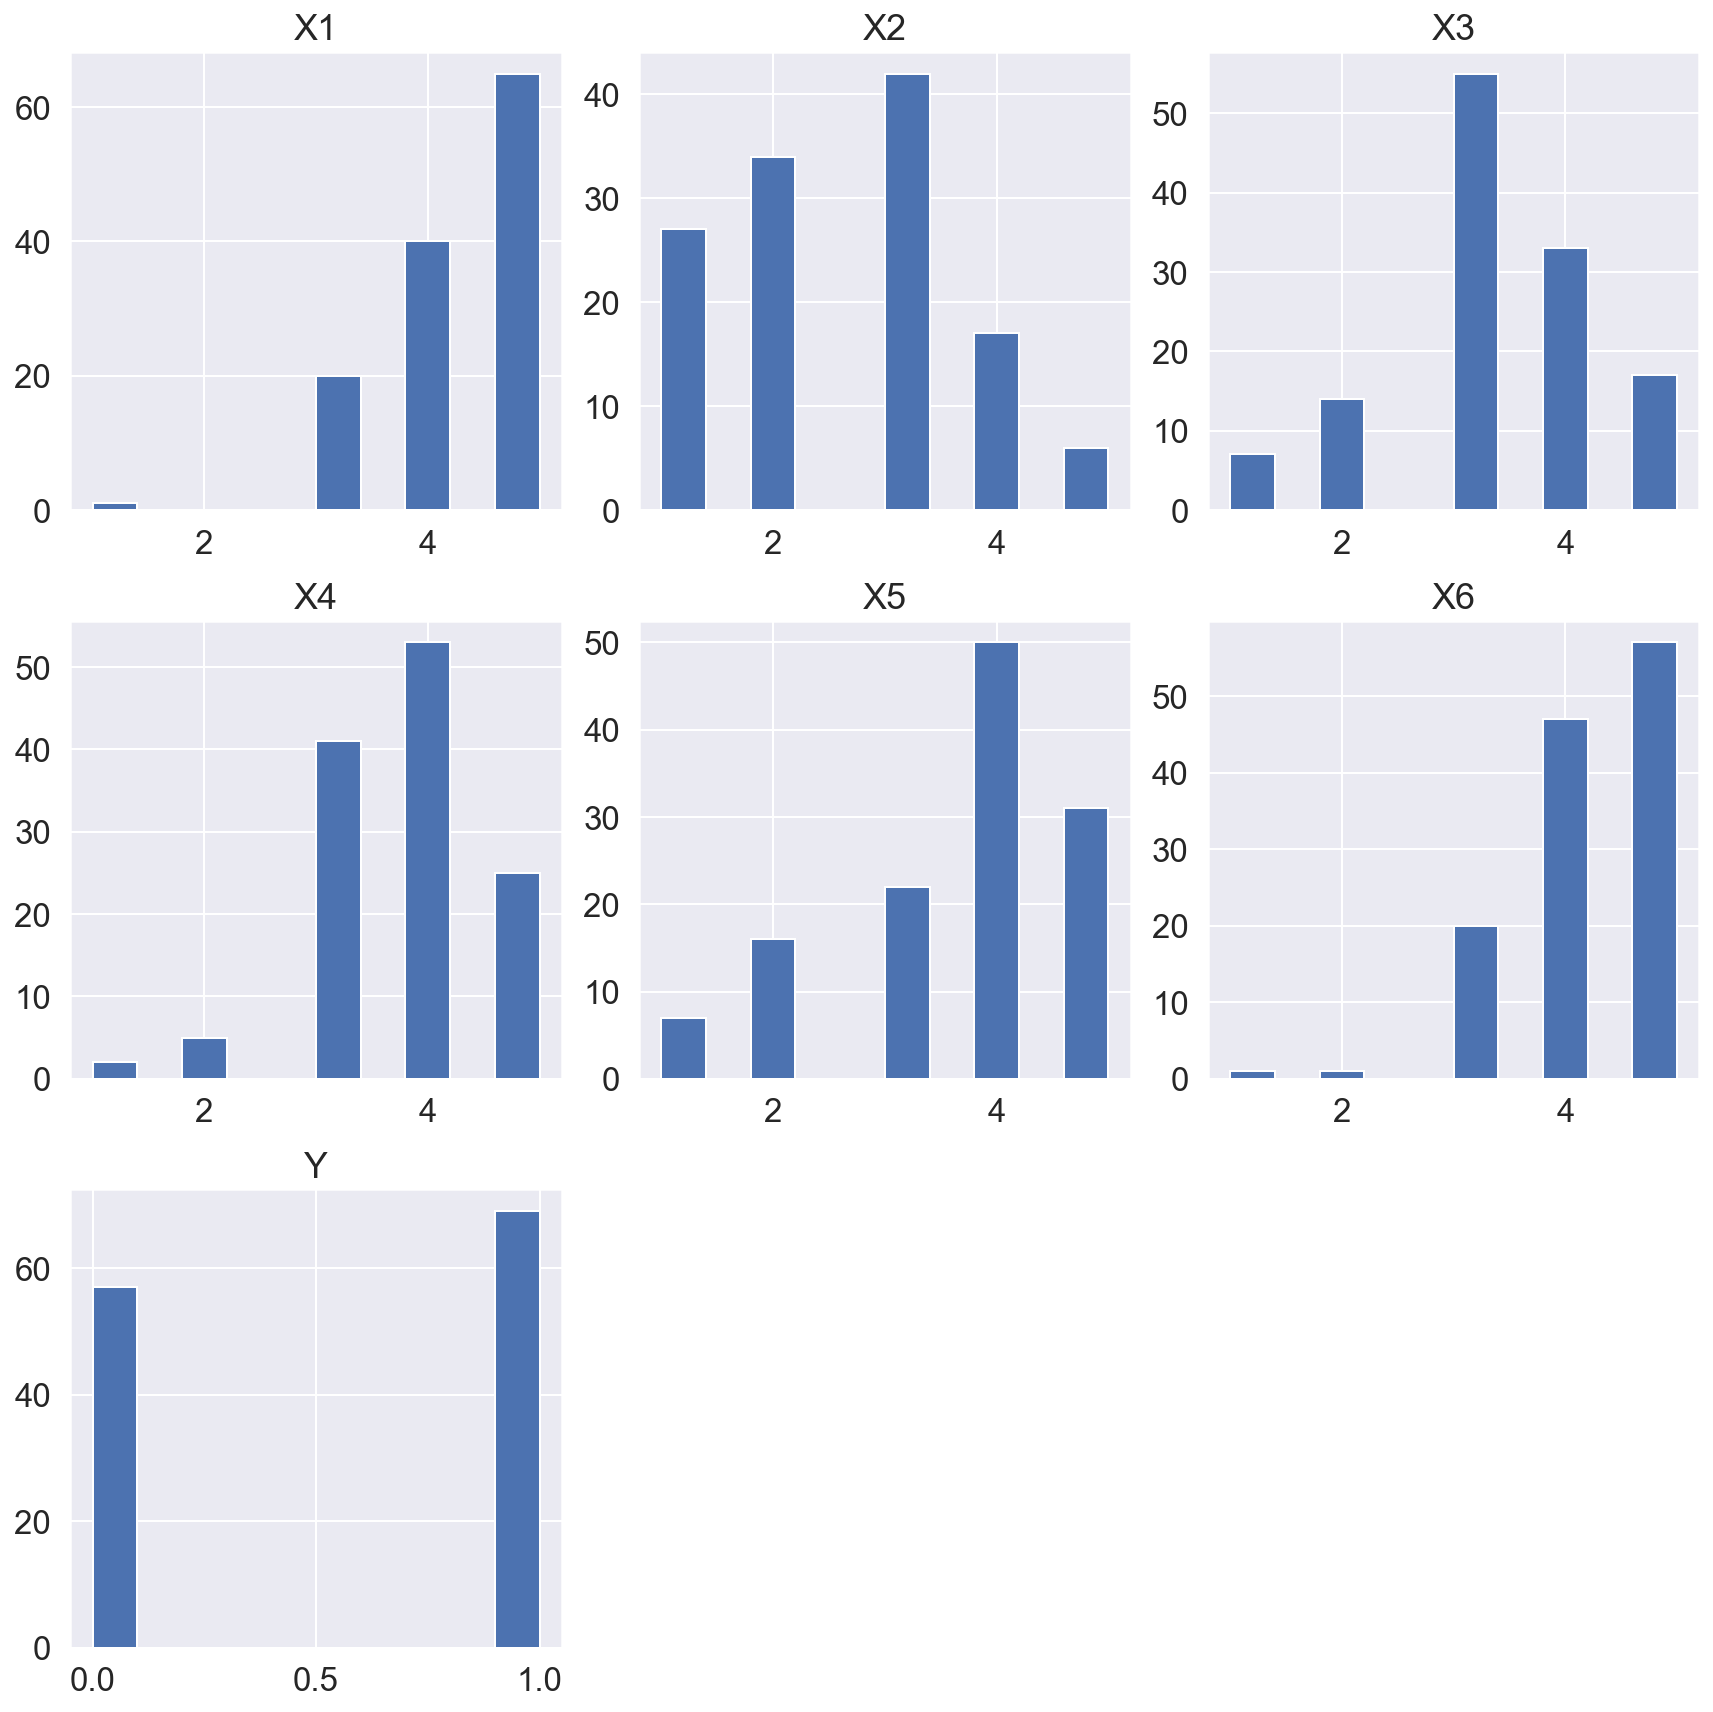

In [14]:
survey.hist(figsize= (12,12))
plt.tight_layout()
plt.show()

## Histograms - Discussions of visualizations

The histograms are showing the following:

X1 - The histogram for this data shows that the data is left skewed (mean less than the median) with most of the responses being 3 or above showing that most customers were mostly satisfied with the delivery time except for one customer was clearly dissatified. 

X2 - The histogram for this data is right skewed (mean greater than the median) most of the responses being 3 or below showing that most customers were clearly dissatisfied with the contents of their orders.

X3 - The histogram for this data shows that the data is left skewed (mean less than the median) with most of the responses being 3 or above showing that most customers were  mostly satisfied with being able to order everything they wanted to order.

X4 - The histogram for this data shows that the data is left skewed (mean less than the median) with most of the responses being 3 or above showing that most customers were  mostly satisfied that they had paid a good price for the order.

X5 -  The histogram for this data shows that the data is left skewed (mean less than the median) with most of the responses being 3 or above showing that most customers were  mostly satisfied with the courier.

X6 - The histogram for this data shows that the data is left skewed (mean less than the median) with most of the responses being 3 or above showing that most customers were  mostly satisfied with the ease of using the the app for ordering except for two customers who were clearly dissatified. 



## Boxplots of Independent variables

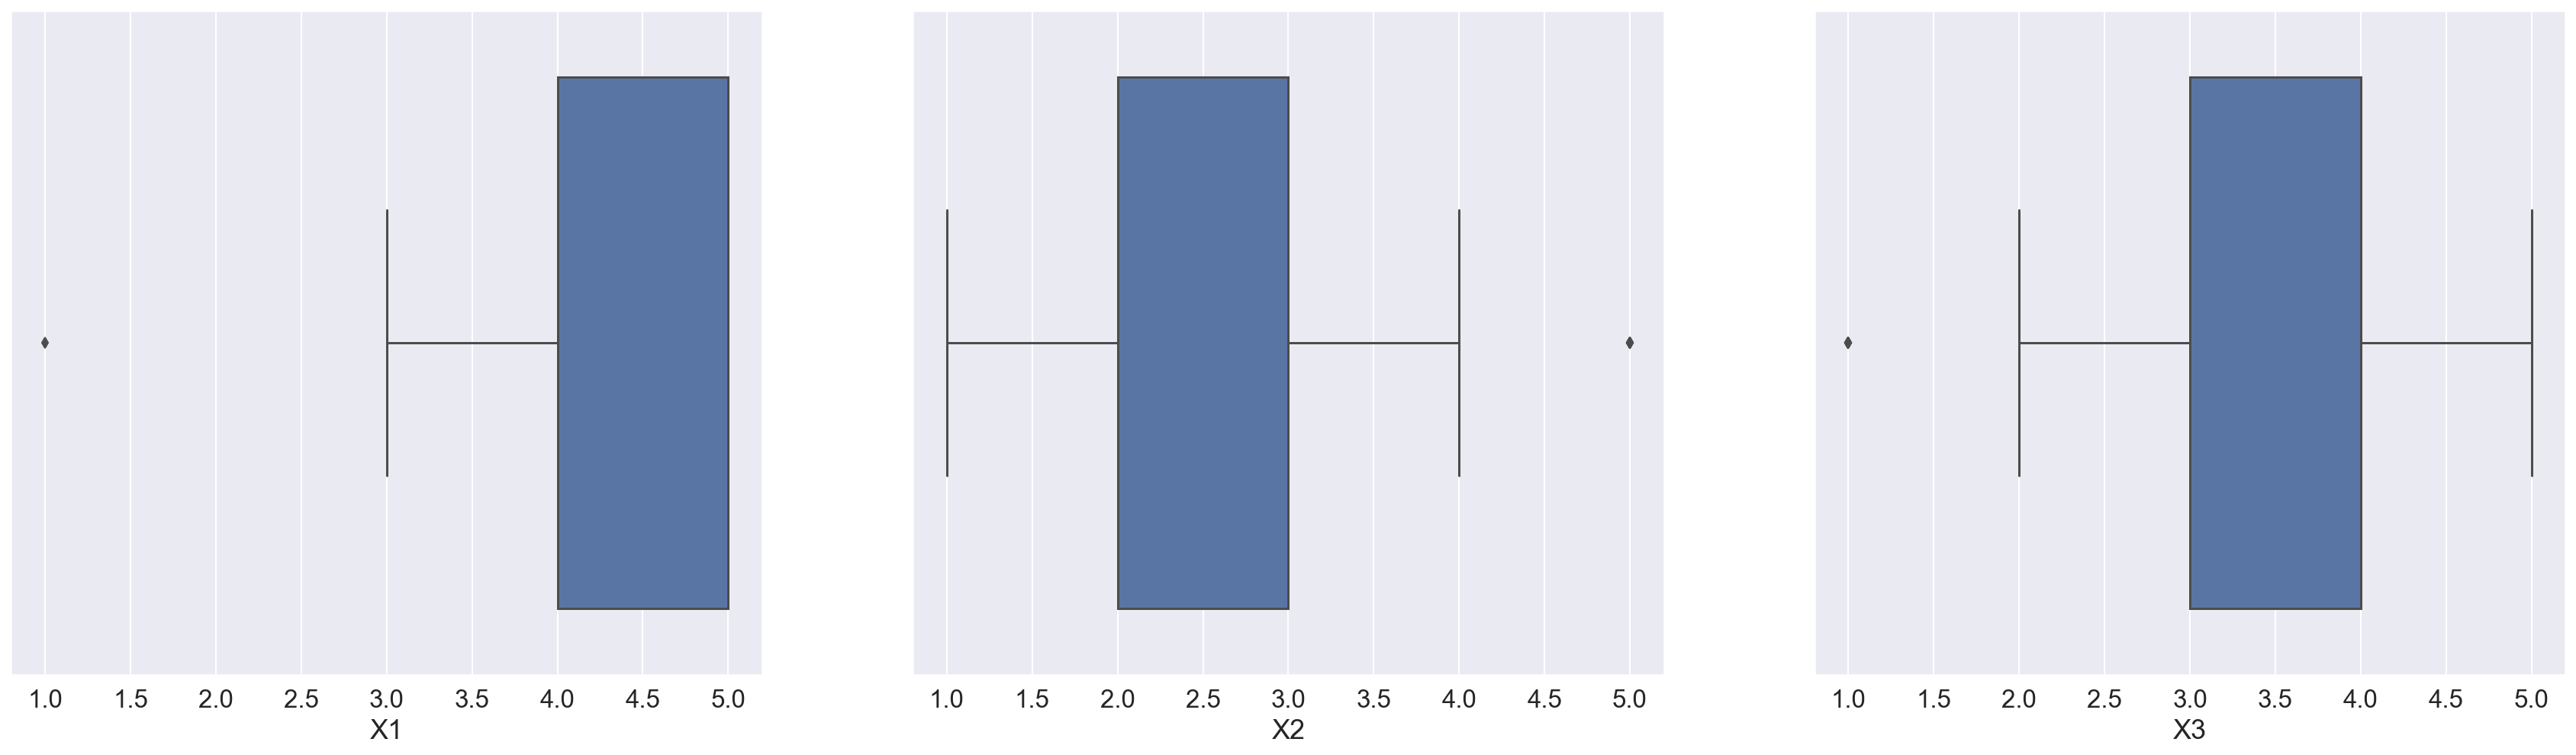

In [15]:
fig, ax = plt.subplots(ncols=3, figsize=(30, 8))

sns.boxplot(x = 'X1', data = survey, ax=ax[0])

sns.boxplot(x = 'X2', data = survey, ax=ax[1])

sns.boxplot(x = 'X3', data = survey, ax=ax[2])

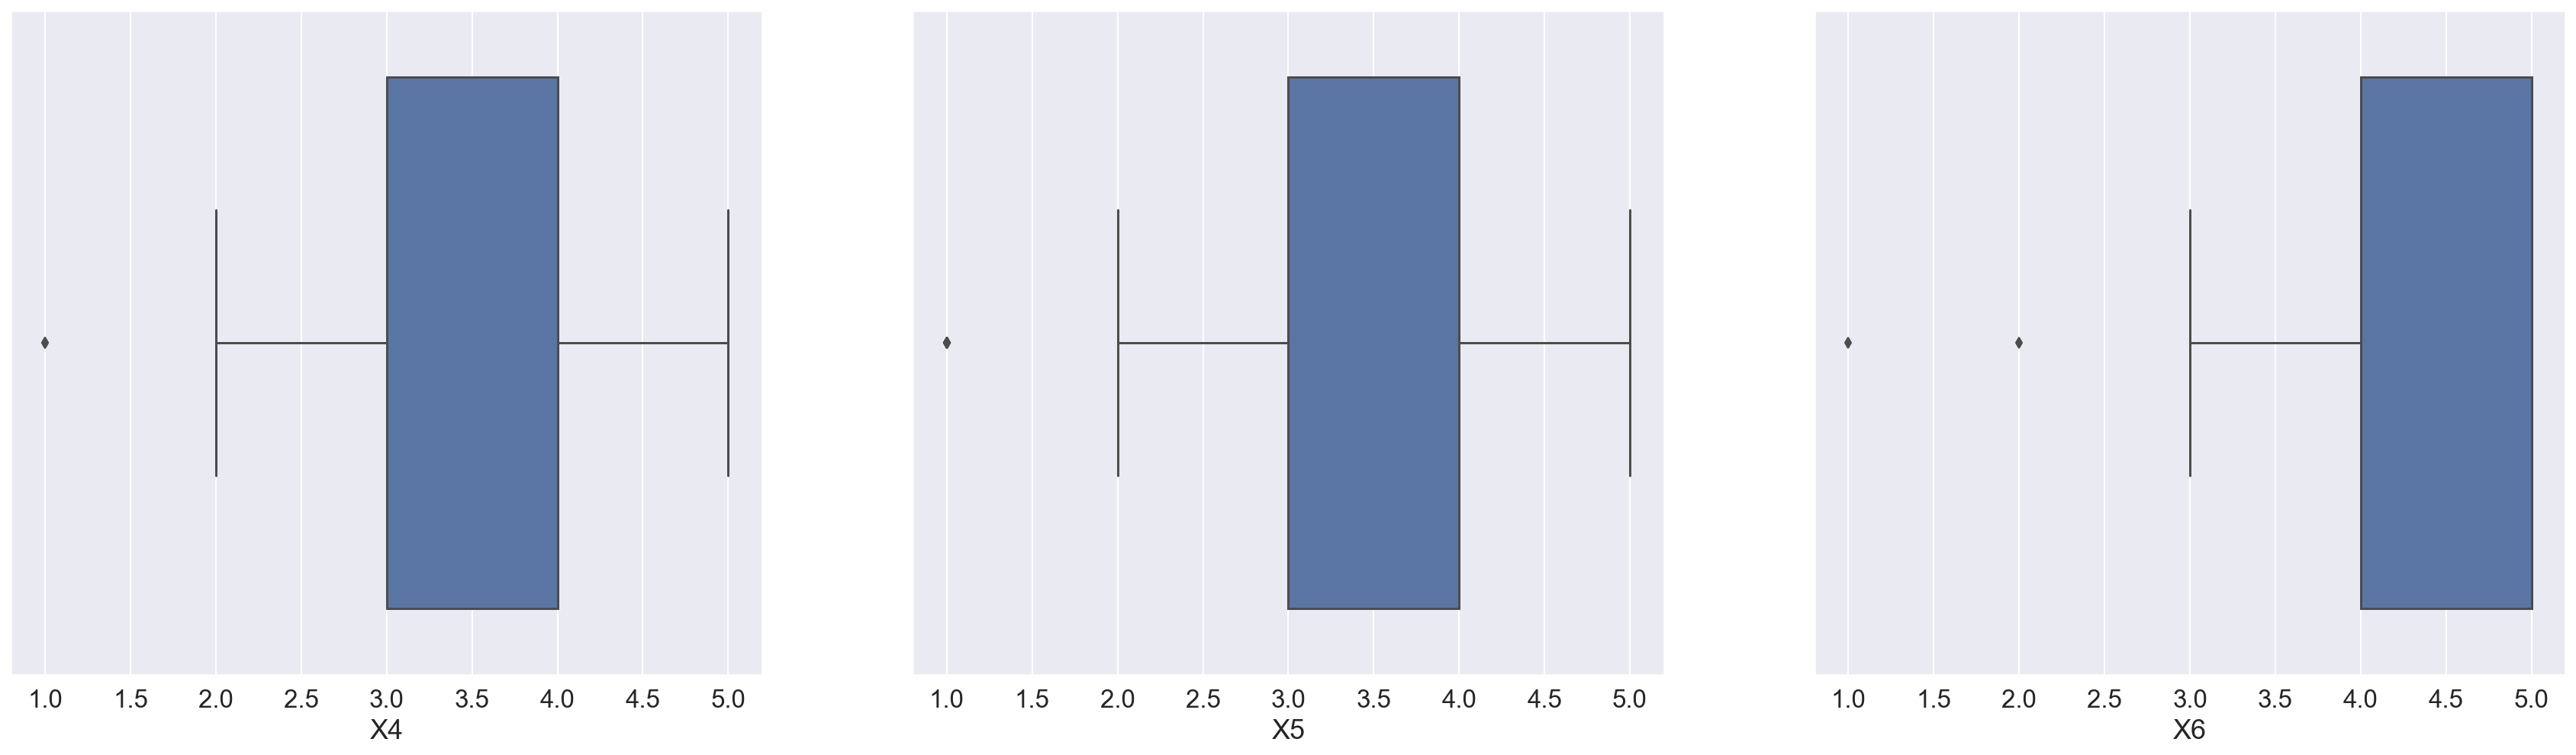

In [16]:
fig, ax = plt.subplots(ncols=3, figsize=(30, 8))

sns.boxplot(x = 'X4', data = survey, ax=ax[0])

sns.boxplot(x = 'X5', data = survey, ax=ax[1])

sns.boxplot(x = 'X6', data = survey, ax=ax[2])

## Box Plots - Discussion of visualizations

The box plots shows that:
* The variables X1, X3, X4, X5 and X6 all have outliers that fall below the value - Q1 -1.5 * IQR where Q1 is the first quartile / 25th percentile and IQR is the interquartile range (25th to 75th percentile).

* The varible X2 shows an outlier that is above the value Q3 + 1.5 * IQR where Q3 is the third quartile / 75th percentile and IQR is the interquartile range (25th to 75th percentile).

No treatment for outliers will be carried out in this solution.

## Heat Map showing correlation of Variables

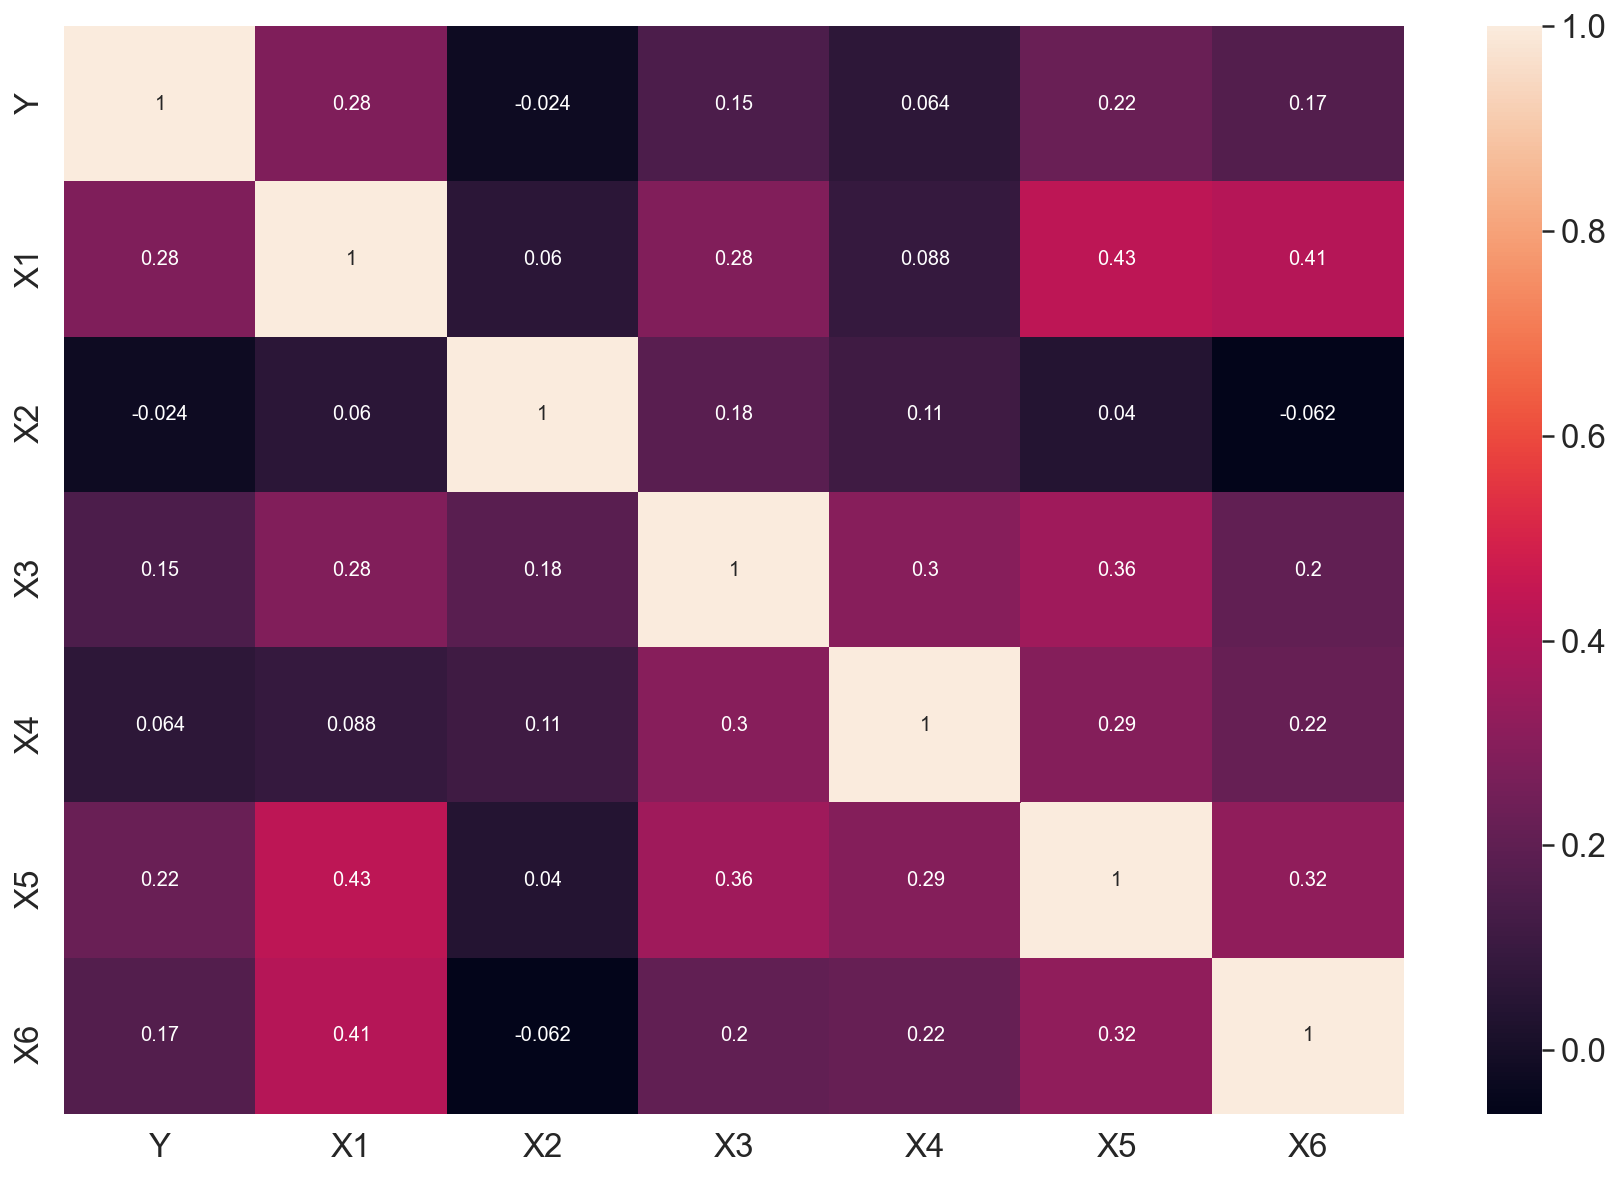

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(survey.corr(), annot =True, ax=ax)
ax.set_ylim([survey.corr().shape[1],0])
plt.show()

## HeatMap - Discussion of visualizations

The heat map above shows us the degree of correlation between the variables. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The closer to 1 the correlation is, the more positively correlated the variables are; that is, as one increases so does the other. The closer the correlation is to 1 the stronger the relationship between the variables. Correlations closer to -1 also shows strong relationships between variables, but a negative one. In this case as one variable increases the other decreases. 

The heat map above shows that: 
* There are low correlations between the target variable Y and the predictor varaibles X1, X2, X3, X4, X5 and X6. The highest correlation bewteen Y and the predictor variables is 0.28 and the lowest -0.024. 

* The predictor varible X1 shows the highest correlation between X5- 0.43 and X6 - 0.41. 

* The predictor variable X5 shows correlation of 0.32 with  varaible X6.

* The predictor variable X3 shows correlation f 0.36 with variable X5.

The correlations less than 0.35 are considered to represenst low or weak correlations and the correlations 0.36 to 0.67 are moderate correlations. 
In the above, we can only see instances of low and moderate correlations between variabes in the dataset.


## Pairplot of Variables

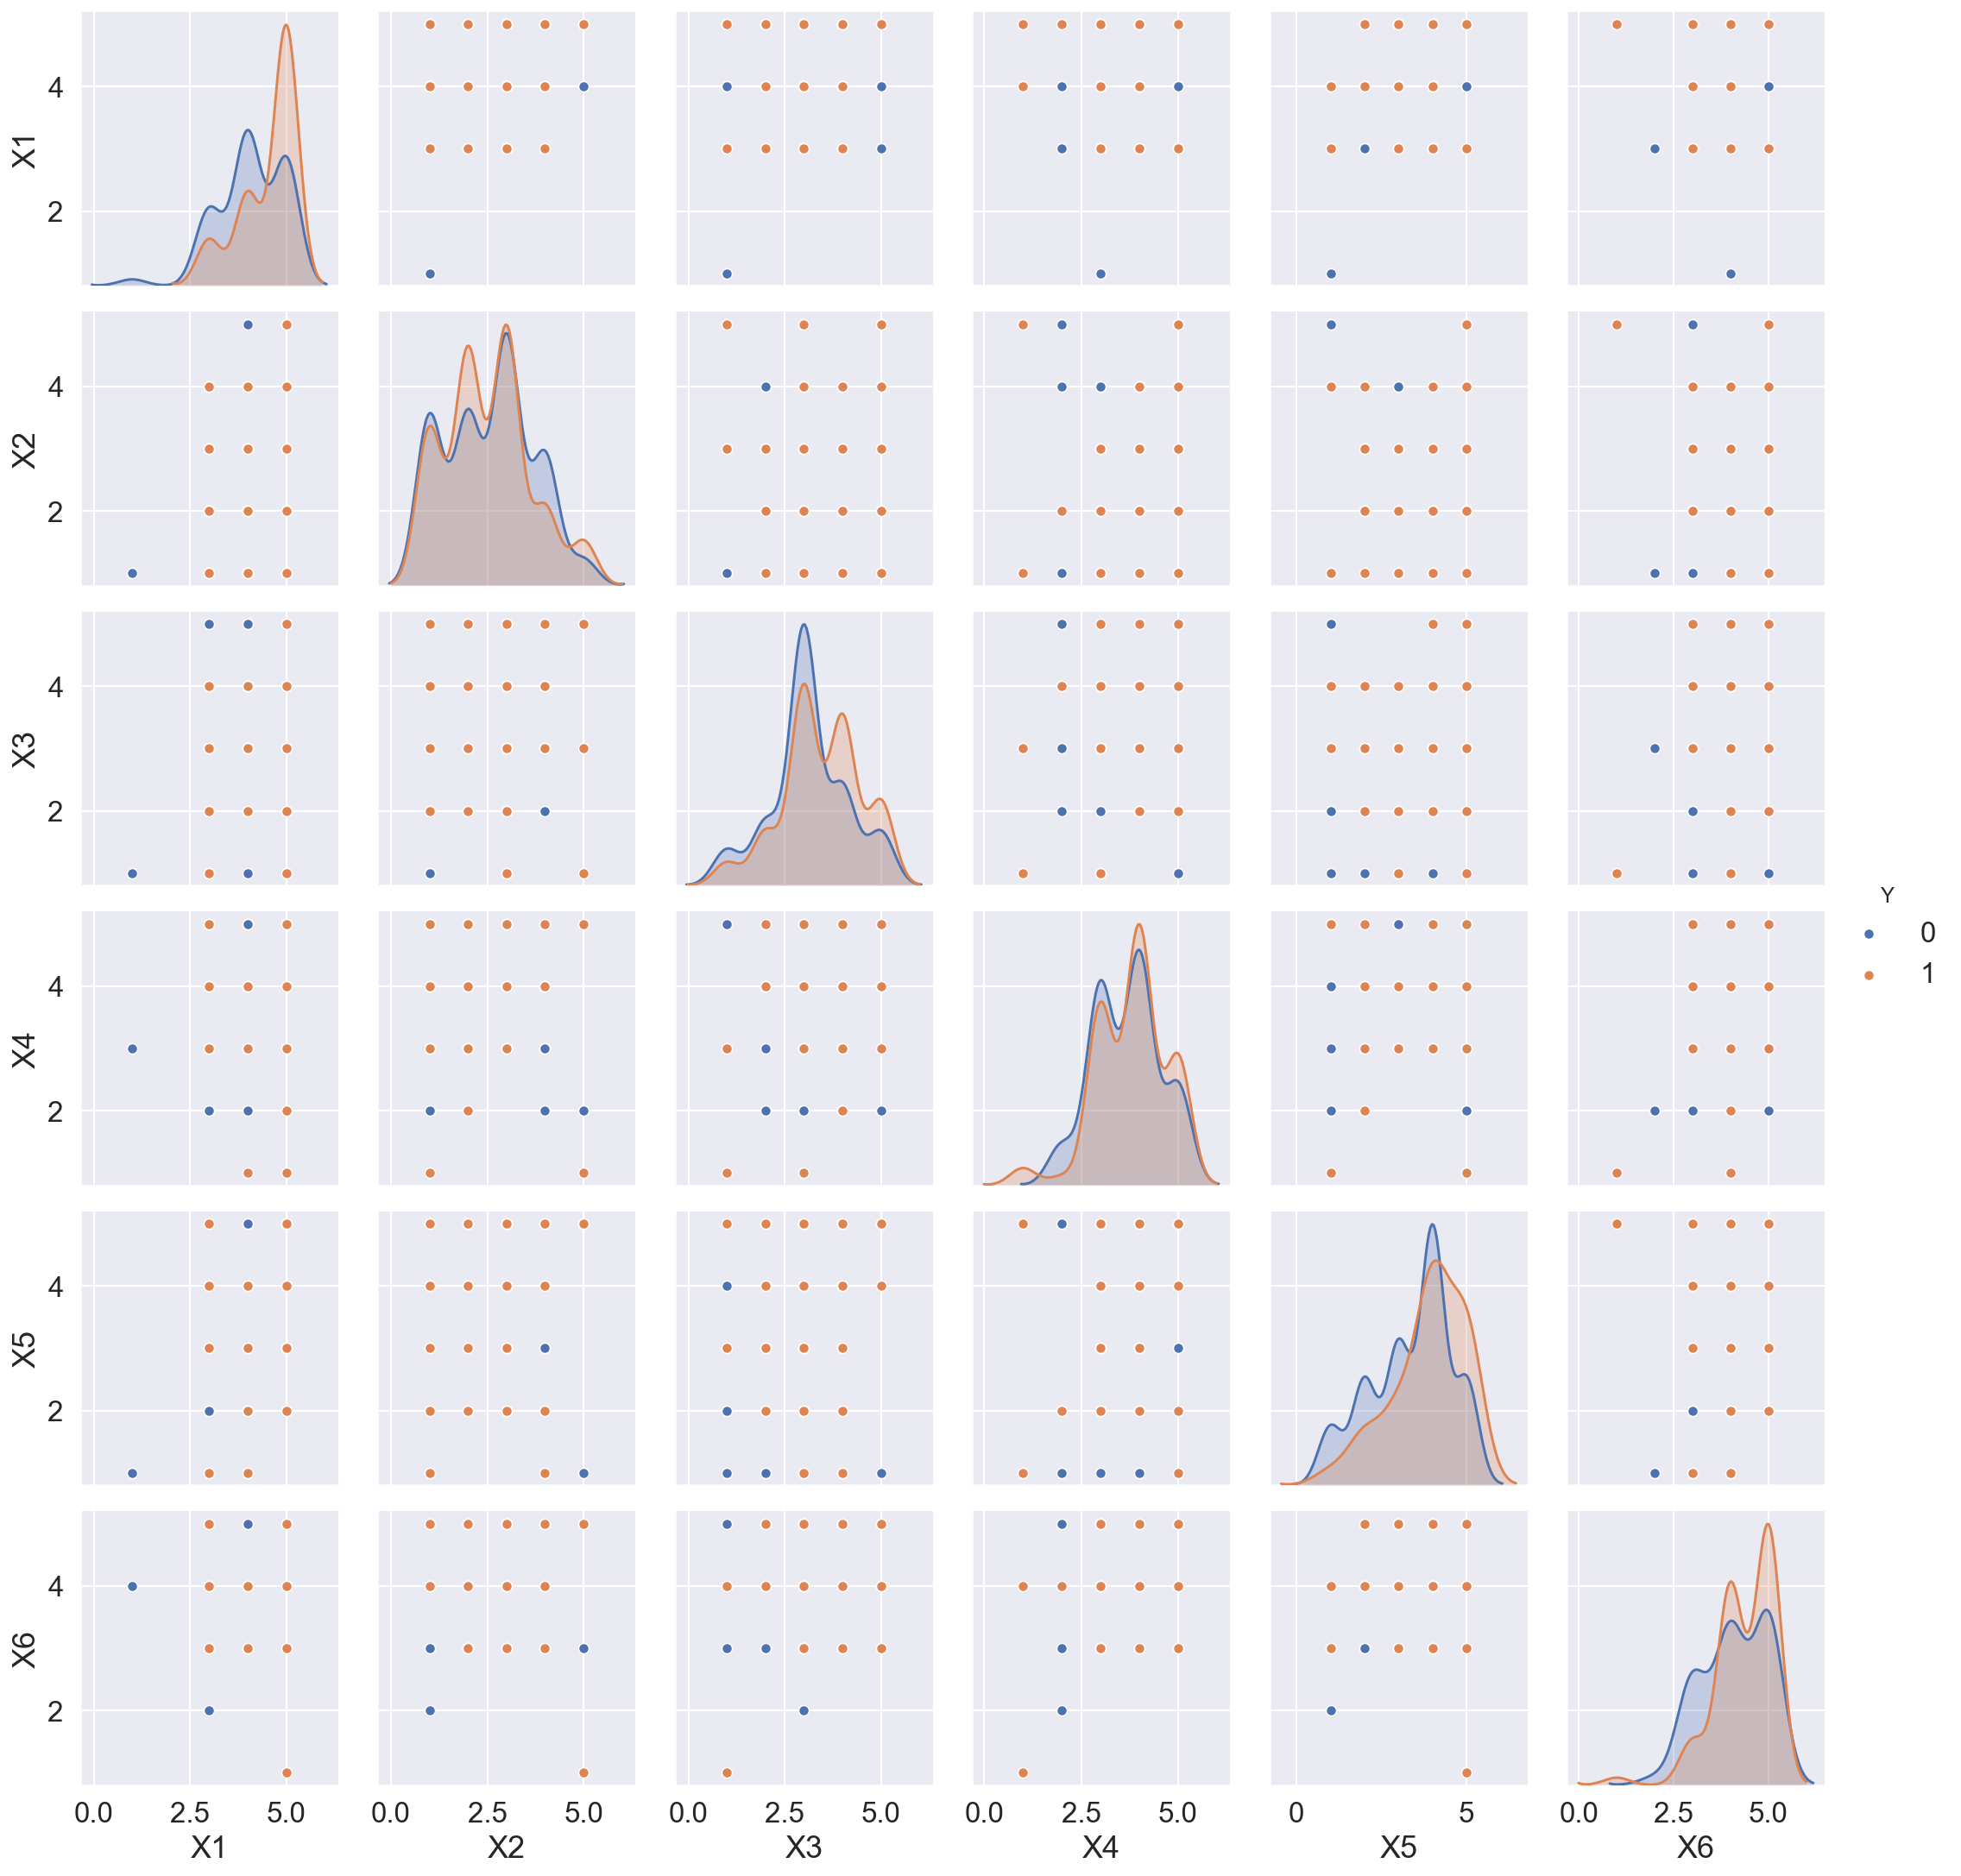

In [18]:
sns.pairplot(survey, hue='Y')
plt.show()

## PairPlots - Discussions of Visualizations

The pair plots shows both the histograms of the variables and the scatterplots.
The histograms are already discussed above.
The scatterplots does not show any clear patterns or trends in the dispersion of the data.



## Count Plots of dependent vs independent variables

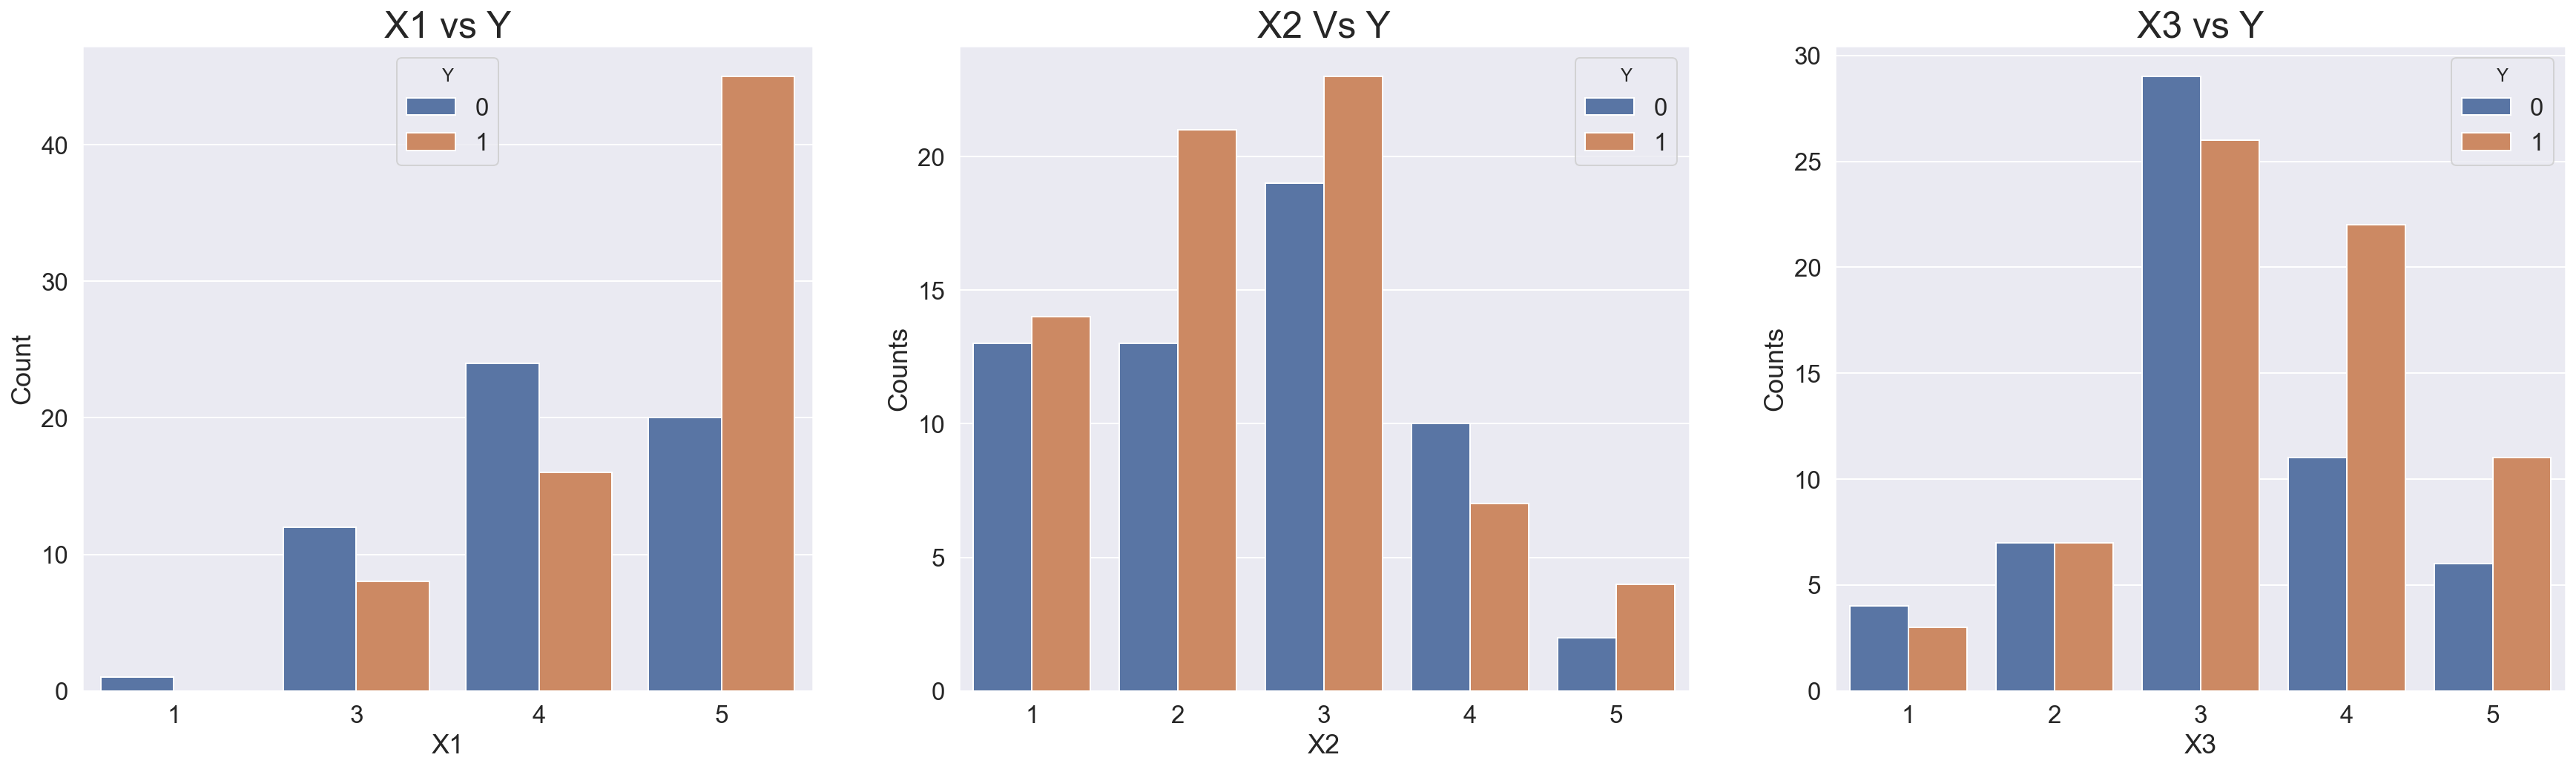

In [19]:
#Create plots for other variables vs TenYearCHD variable.

fig, ax = plt.subplots(ncols=3, figsize=(30, 8))

sns.countplot(x = 'X1', hue ='Y', data = survey, ax=ax[0])
ax[0].set_xlabel('X1')
ax[0].set_ylabel('Count')
ax[0].set_title('X1 vs Y',fontsize =25)

sns.countplot(x = 'X2', hue ='Y', data = survey, ax=ax[1])
ax[1].set_xlabel('X2')
ax[1].set_ylabel('Counts')
ax[1].set_title('X2 Vs Y',fontsize =25)

sns.countplot(x = 'X3', hue ='Y', data = survey, ax=ax[2])
ax[2].set_xlabel('X3')
ax[2].set_ylabel('Counts')
ax[2].set_title('X3 vs Y',fontsize =25)

plt.show()

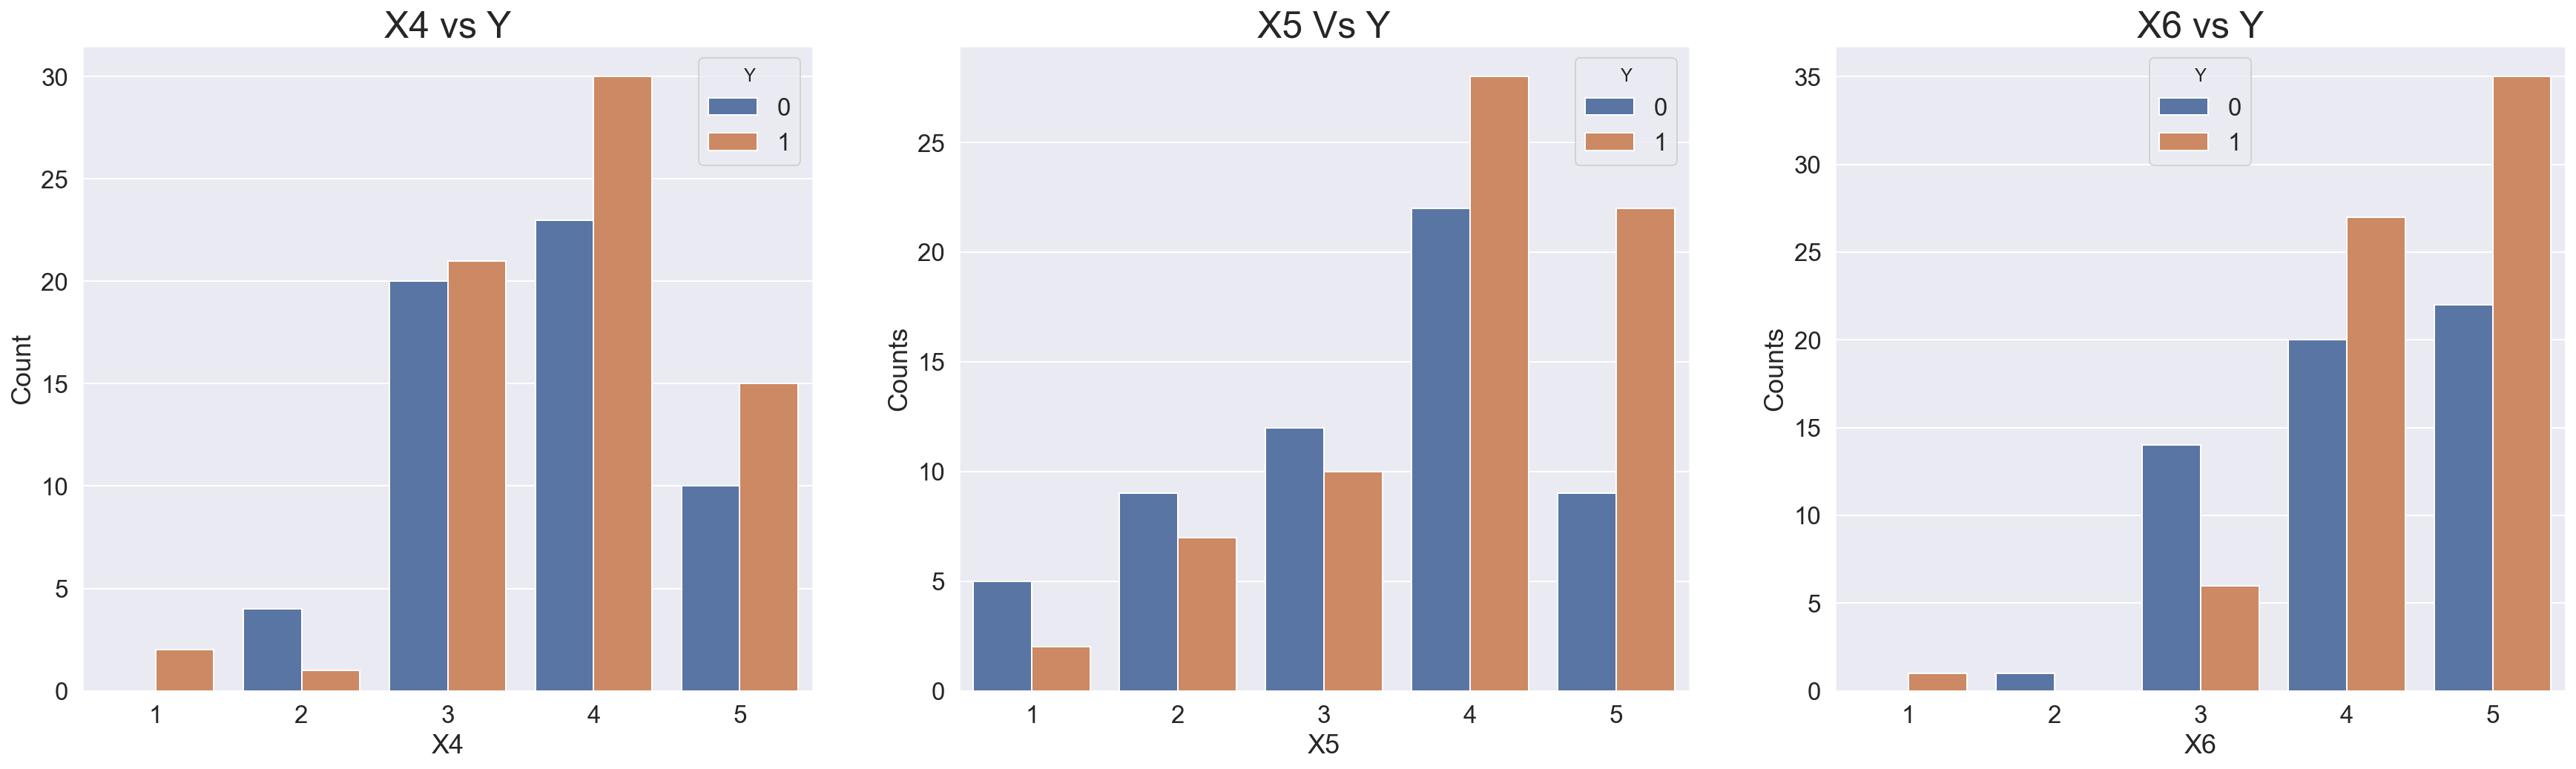

In [20]:
#Create plots for other variables vs TenYearCHD variable.

fig, ax = plt.subplots(ncols=3, figsize=(30, 8))

sns.countplot(x = 'X4', hue ='Y', data = survey, ax=ax[0])
ax[0].set_xlabel('X4')
ax[0].set_ylabel('Count')
ax[0].set_title('X4 vs Y',fontsize =25)

sns.countplot(x = 'X5', hue ='Y', data = survey, ax=ax[1])
ax[1].set_xlabel('X5')
ax[1].set_ylabel('Counts')
ax[1].set_title('X5 Vs Y',fontsize =25)

sns.countplot(x = 'X6', hue ='Y', data = survey, ax=ax[2])
ax[2].set_xlabel('X6')
ax[2].set_ylabel('Counts')
ax[2].set_title('X6 vs Y',fontsize =25)

plt.show()

## Count Plots - Discussion of visualizations

In the count plots we are visualising the predictor varibles with the target variable Y.
We can see from the plots that:

* X1 vs Y - The majority of customers were satisfied with the delivery time. We can see from this that customers who were assessed as overall not happy were either indifferent or scored the delivery time a 4/5 which was on the high scale. There were more happy customers who were satisfied with the delivery time than unhappy customers. 

* X2 vs Y - The majority of customers were dissatified with the contents of their orders, with happy customers showing a higher percentage than unhappy customers.

* X3 vs Y - The majority of customers were satisfied with being able to order everything they wanted to order. We can see from this that customers who were assessed as overall not happy were either indifferent or scored the delivery time a 4/5 which was on the high scale. There were more happy customers who were satisfied with being able to order everything they wanted to order than unhappy customers.

* X4 vs Y - The majority of customers were satisfied that they had paid a good price for the order. We can see from this that customers who were assessed as overall not happy were either indifferent or scored the delivery time a 4/5 which was on the high scale. There were more happy customers who were satisfied that they had paid a good price for the order than unhappy customers.

* X5 vs Y - The majority of customers were satisfied with the courier. We can see from this that customers who were assessed as overall not happy were either indifferent or scored the delivery time a 4/5 which was on the high scale. There were more happy customers who were satisfied with with the courier than unhappy customers.

* X6 vs Y - The majority of customers were satisfied with the ease of using the the app for ordering. We can see from this that customers who were assessed as overall not happy were either indifferent or scored the delivery time a 4/5 which was on the high scale. There were more happy customers who were satisfied with the ease of using the the app for ordering than unhappy customers.



In [21]:
#Baseline : 0 - Unhappy, 1- happy
survey.Y.value_counts(normalize=True)

1    0.547619
0    0.452381
Name: Y, dtype: float64

# Project Goal

The dataset shows that the level of happy customers is 55% vs unhappy customers of 45%. 
As high customer satisfaction is critical to the desired global expansion strategy, it is important that the company is able to keep their customers happy and potentially be able to increase the number of happy customers based on the level of service provided.

The target variable for this project is Y.

The baseline for the target variable has been assessed as follows: Baseline -

0 - Unhappy - 0.4524
1 - Happy - 0.5476
The data will be split in train and test dataset in a 80:20 split and the following classification models will be ran:

The problem is a classification problem as the target variables are binary classifiers. Based on this we will use Machine learning classifers to predict the happy customers in a model and assess the accuracy of the model. 

The following classifiers will be used in the project:

* Logistic regression Classifier,
* Decision Tree Classifier, 
* Adaboost Classifier, 
* GradientBoosting Clasifier and 
* Random Forest Classifier. 

The models will be assessed using accuracy as the metric, where the model that achieves an accuracy score greater than 73% will be determined as the best performing model.
 




## Splitting data between Target variable - Y  and predictor variables - X1 to X6

In [22]:
#Get X and y data 
#Dummifying the predictor variables identified as classification variables.

df = survey.copy()
y = df.pop('Y')
X = df
X = pd.get_dummies(X, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], drop_first=True)

In [23]:
X.shape

(126, 23)

In [24]:
# split data between test and training data , standardising the data 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                        stratify=y, test_size=0.2, random_state=1)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,X1_3,X1_4,X1_5,X2_2,X2_3,X2_4,X2_5,X3_2,X3_3,X3_4,...,X4_4,X4_5,X5_2,X5_3,X5_4,X5_5,X6_2,X6_3,X6_4,X6_5
0,-0.420084,1.527525,-1.083473,-0.670280,1.491914,-0.386556,-0.229416,-0.333333,1.175139,-0.592749,...,1.277333,-0.484322,2.708013,-0.515580,-0.733799,-0.608164,-0.100504,-0.420084,1.393261,-1.0
1,-0.420084,-0.654654,0.922958,-0.670280,1.491914,-0.386556,-0.229416,-0.333333,-0.850963,1.687055,...,-0.782881,-0.484322,-0.369274,-0.515580,1.362770,-0.608164,-0.100504,2.380476,-0.717741,-1.0
2,-0.420084,-0.654654,0.922958,-0.670280,-0.670280,-0.386556,-0.229416,-0.333333,-0.850963,1.687055,...,-0.782881,-0.484322,-0.369274,-0.515580,1.362770,-0.608164,-0.100504,-0.420084,-0.717741,1.0
3,-0.420084,-0.654654,0.922958,1.491914,-0.670280,-0.386556,-0.229416,-0.333333,-0.850963,1.687055,...,-0.782881,-0.484322,-0.369274,-0.515580,1.362770,-0.608164,-0.100504,-0.420084,-0.717741,1.0
4,-0.420084,1.527525,-1.083473,-0.670280,1.491914,-0.386556,-0.229416,-0.333333,1.175139,-0.592749,...,-0.782881,-0.484322,-0.369274,1.939563,-0.733799,-0.608164,-0.100504,-0.420084,1.393261,-1.0


# Logistic Regression Model

In [25]:
model = LogisticRegression(max_iter=100000)

In [26]:
# setup the grid search

params = {'C': np.logspace(-4, 2, 10),
          'solver': ['liblinear'],
          'penalty': ['l2'],
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True,
                  n_jobs=-2)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))


Best Parameters:
{'C': 0.0001, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator C:
0.0001
Best estimator mean cross validated training score:
0.6300000000000001
Best estimator score on the full training set:
0.66
Best estimator score on the test set:
0.5769230769230769


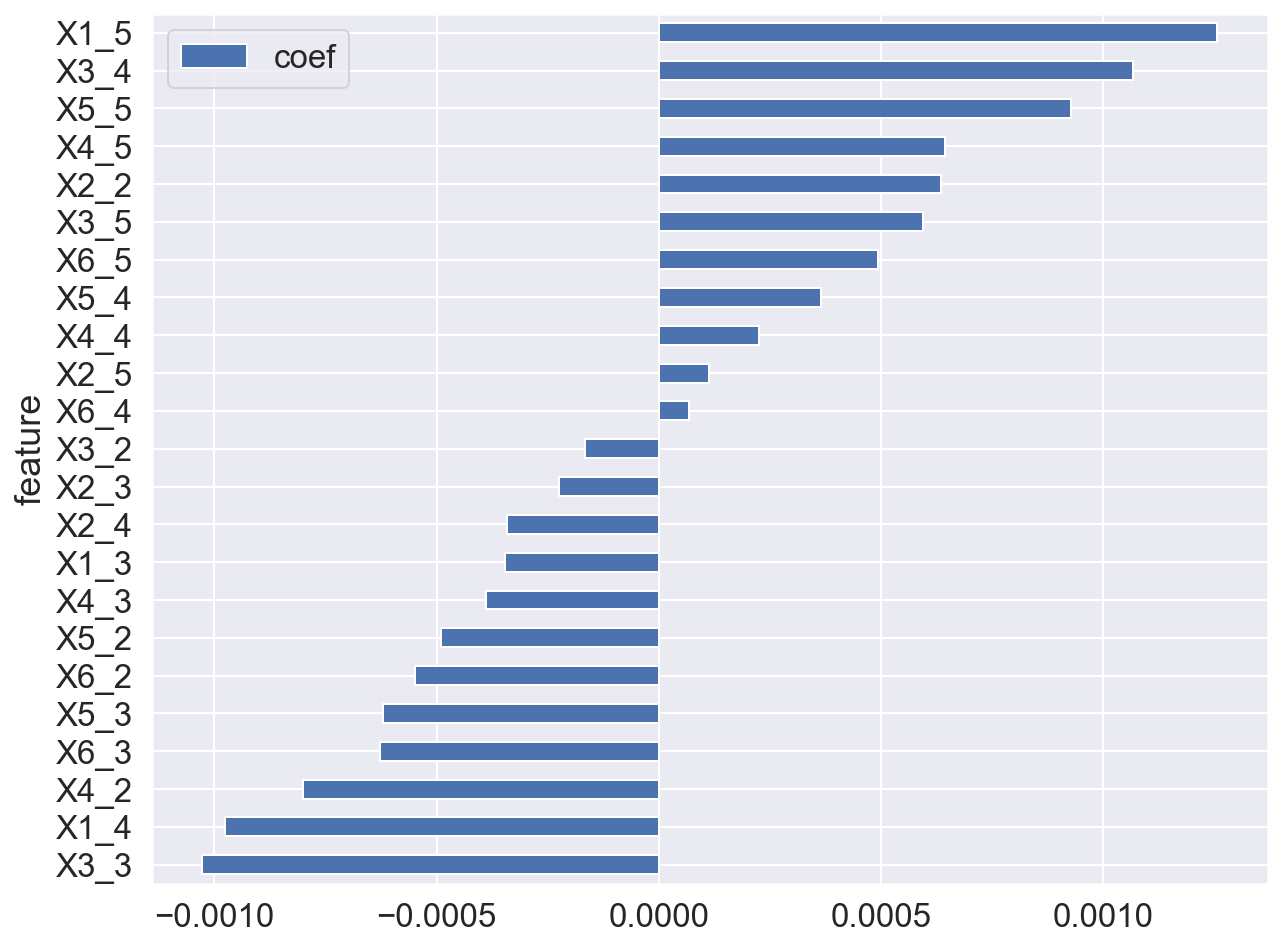

In [27]:
pd.DataFrame(list(zip(X.columns, gs.best_estimator_.coef_[0])), columns=['feature', 'coef']
            ).sort_values(by='coef'
                         ).plot(kind='barh', x='feature', y='coef', figsize=(10, 8))
plt.show()

In [28]:
predictions_train = gs.predict(X_train)
predictions_test = gs.predict(X_test)

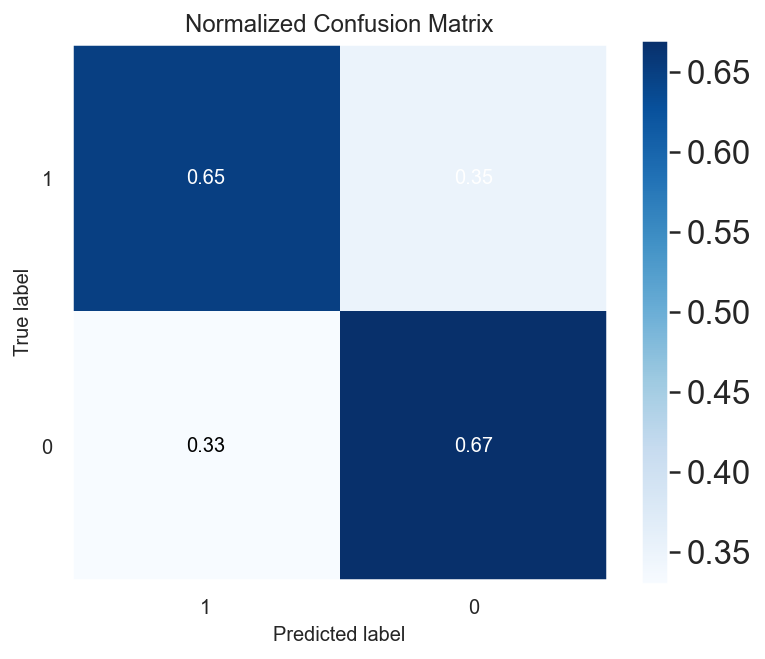

In [29]:
skplt.metrics.plot_confusion_matrix(y_train, predictions_train, labels=[1, 0], figsize=(6,5), normalize='all')
plt.show()

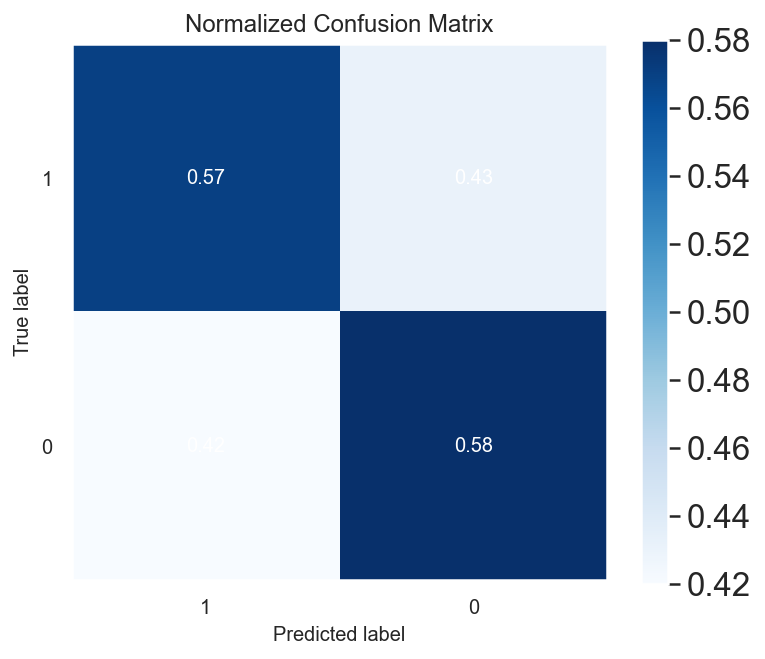

In [30]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_test, labels=[1, 0], figsize=(6,5), normalize='all')
plt.show()

In [31]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64        45
           1       0.71      0.65      0.68        55

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.66      0.66      0.66       100



In [32]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.62      0.57      0.59        14

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.58      0.58      0.58        26



# Summary of Results - Logistic regression Model

The logistic regression model achieved a performance above baseline (55%) on both the training (66%) and test (58%) scores.

The classification matrix shows that the accuracy achieved for this model as follows:
* Training sample - 66%
* Test sample - 58%

For this model the test set has performed considerably worse than the training set which is an indication that overfittting has occurred in training the model.

As the test sample achieved accuracy levels below the target of 73%, this model would not be selected.



# Decision Tree Model

In [33]:
DTree = DecisionTreeClassifier()

# gridsearch params
dtc_params = {
              'max_depth': list(range(1, 11))+[None],
              'max_features': [None, 1, 2, 3],
              'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50],
              'ccp_alpha': [0, 0.001, 0.005, 0.01]
             }

# set the gridsearch
dtc_gs = GridSearchCV(DTree, dtc_params, cv=5, verbose=1, n_jobs=-2)

# use the gridearch model to fit the data
dtc_gs.fit(X_train, y_train)
dtc_best = dtc_gs.best_estimator_
print("Best Params:", dtc_gs.best_params_)
print("Best Score:", dtc_gs.best_score_)
print("Training Score:",dtc_gs.score(X_train, y_train))
print("Test Score:", dtc_gs.score(X_test, y_test))


Fitting 5 folds for each of 1936 candidates, totalling 9680 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 4146 tasks      | elapsed:    4.1s


Best Params: {'ccp_alpha': 0, 'max_depth': 3, 'max_features': None, 'min_samples_split': 5}
Best Score: 0.6799999999999999
Training Score: 0.75
Test Score: 0.6538461538461539


[Parallel(n_jobs=-2)]: Done 9680 out of 9680 | elapsed:    9.7s finished


In [34]:
fi = pd.DataFrame({
    'feature': X.columns,
    'importance': dtc_best.feature_importances_
})

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
16,X5_3,0.269471
2,X1_5,0.195120
4,X2_3,0.177758
9,X3_4,0.128454
13,X4_4,0.118369
7,X3_2,0.110828
0,X1_3,0.000000
14,X4_5,0.000000
21,X6_4,0.000000
20,X6_3,0.000000


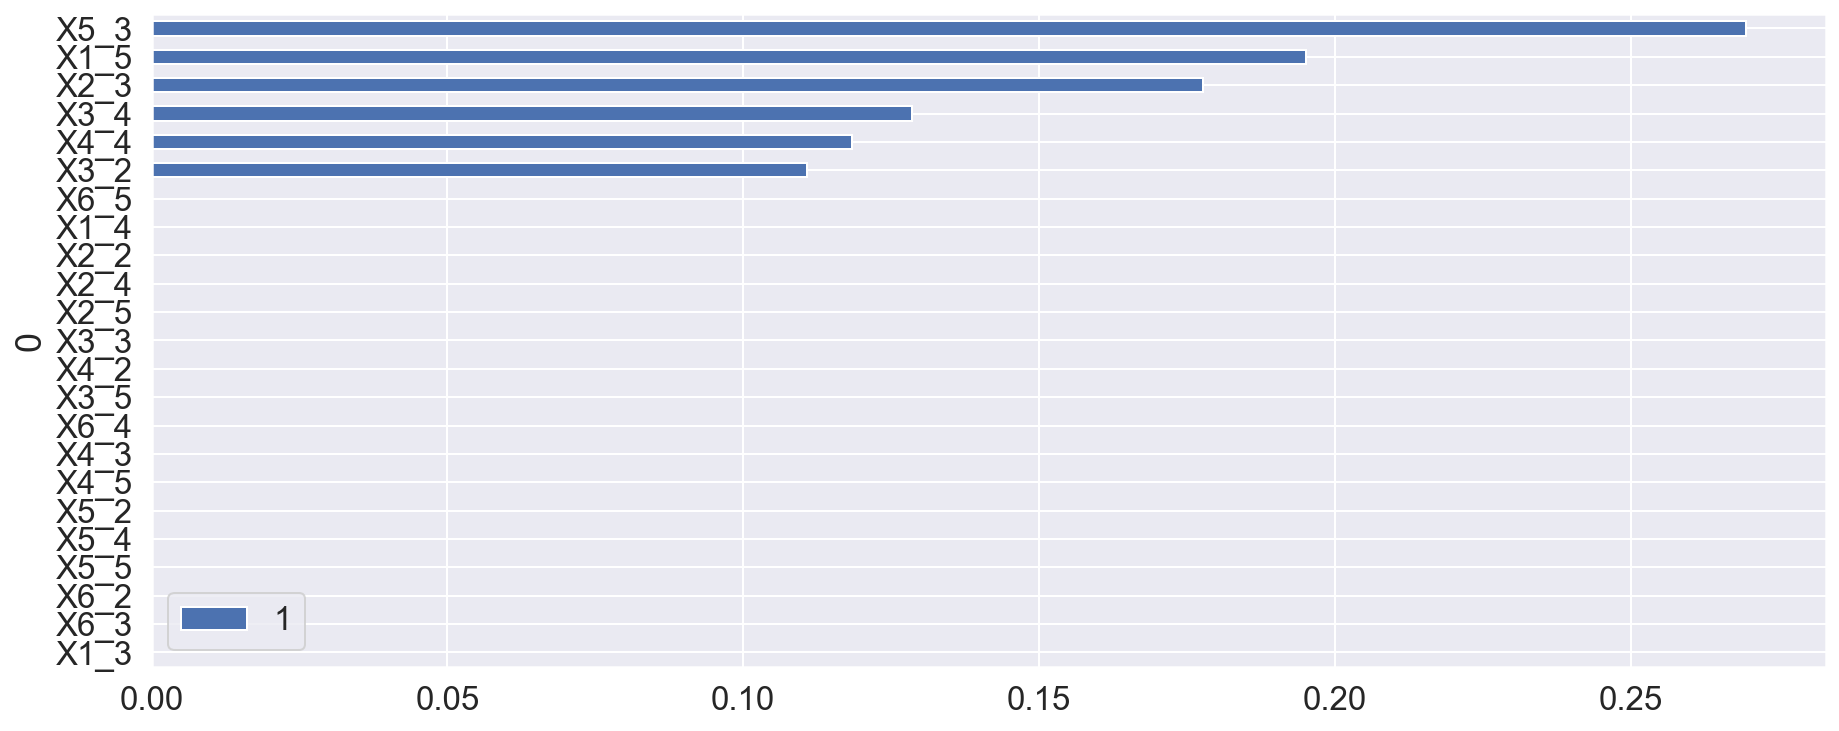

In [35]:
pd.DataFrame(list(zip(X_train.columns, dtc_best.feature_importances_))
            ).sort_values(by=1, ascending=True
                         ).plot(kind='barh', x=0, y=1, figsize=(15, 6))
plt.show()

In [36]:
predictions1_train = dtc_gs.predict(X_train)
predictions1_test = dtc_gs.predict(X_test)

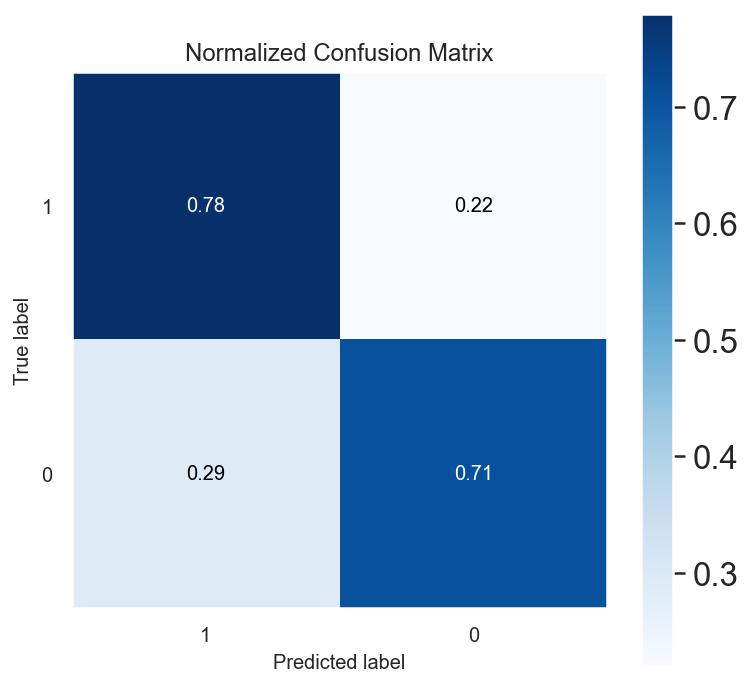

In [37]:
skplt.metrics.plot_confusion_matrix(y_train, predictions1_train, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

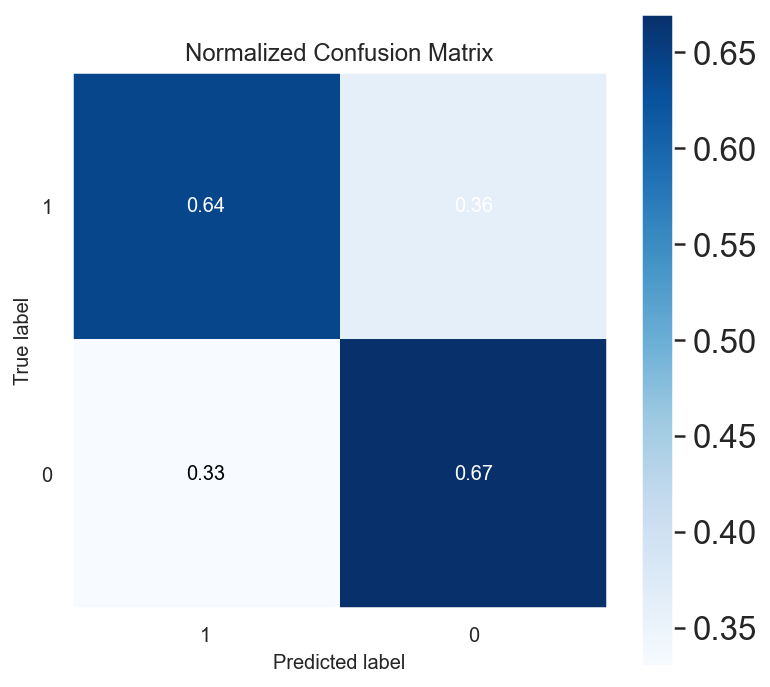

In [38]:
skplt.metrics.plot_confusion_matrix(y_test, predictions1_test, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

In [39]:
print(classification_report(y_train, predictions1_train))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        45
           1       0.77      0.78      0.77        55

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



In [40]:
print(classification_report(y_test, predictions1_test))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.69      0.64      0.67        14

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.66      0.65      0.65        26



# Summary of Results - Decision Tree Model

The Decision Tree model achieved a performance above baseline (55%) on both the training (75%) and test (65%) scores.

The classification matrix shows that the accuracy achieved for this model as follows:
* Training sample - 75%
* Test sample - 65%

For this model the test set has performed considerably worse than the training set which is an indication that overfittting has occurred in training the model.

The test sample achieved accuracy levels below the target of 73% and so this model would not be selected.



# Decision Tree with Adaboost

In [41]:
base_estimator = DecisionTreeClassifier(max_depth=5)
Aboost = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=10,
                           random_state=1, algorithm='SAMME')
Aboost.fit(X_train, y_train)

print(Aboost.score(X_train, y_train))
print(cross_val_score(Aboost, X_train, y_train, cv=5).mean())
print(Aboost.score(X_test, y_test))

0.92
0.62
0.5


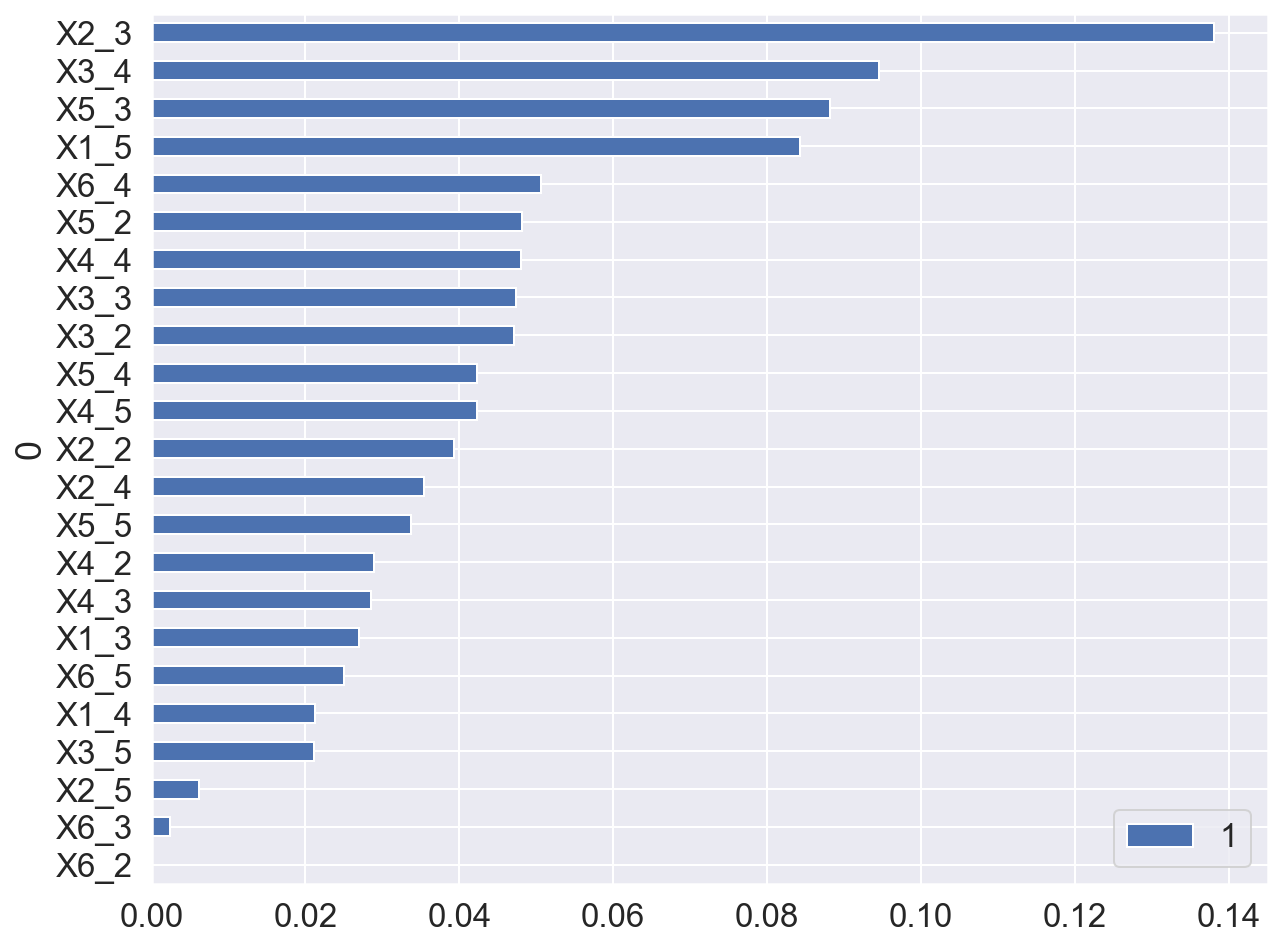

In [42]:
pd.DataFrame(list(zip(X_train.columns, Aboost.feature_importances_))
            ).sort_values(by=1, ascending=True
                         ).plot(kind='barh', x=0, y=1, figsize=(10,8))
plt.show()

In [43]:
predictions5_train = Aboost.predict(X_train)
predictions5_test = Aboost.predict(X_test)

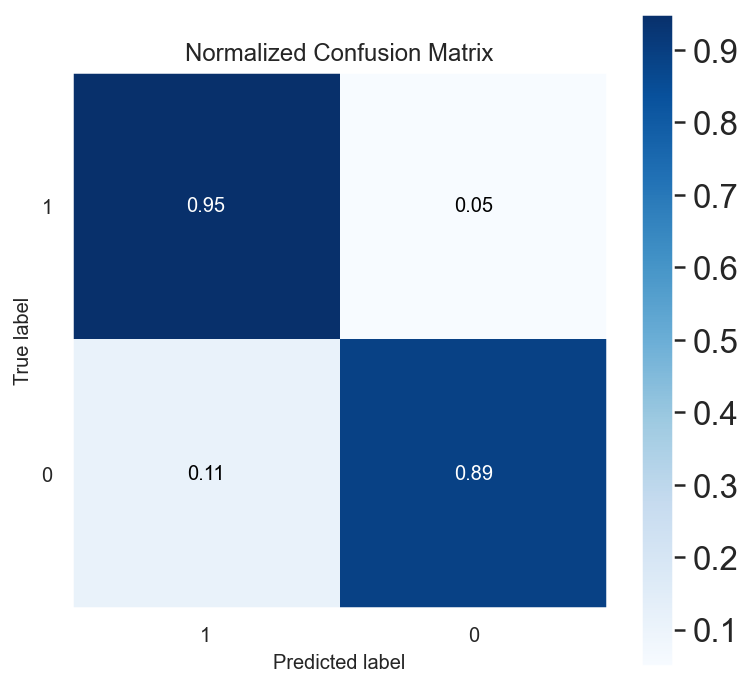

In [44]:
skplt.metrics.plot_confusion_matrix(y_train, predictions5_train, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

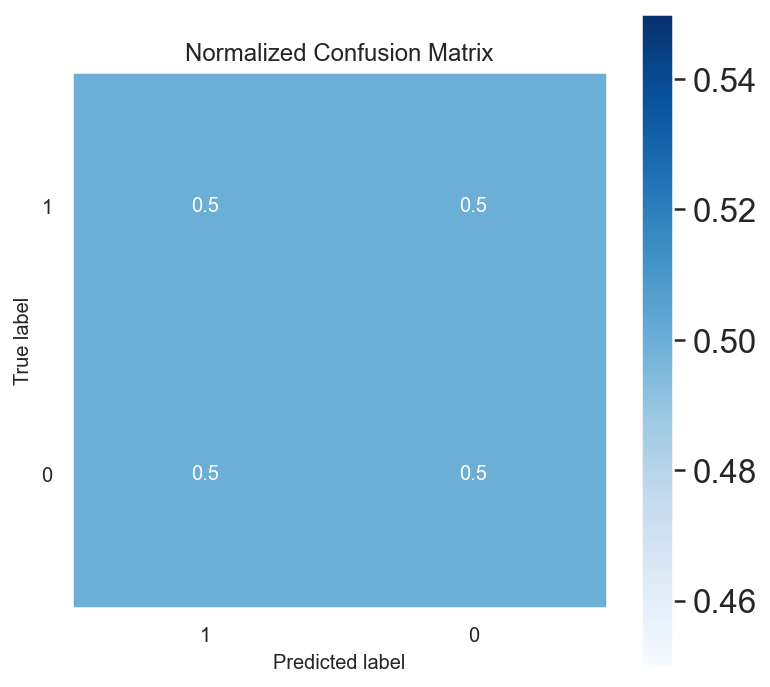

In [45]:
skplt.metrics.plot_confusion_matrix(y_test, predictions5_test, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

In [46]:
print(classification_report(y_train, predictions5_train))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        45
           1       0.91      0.95      0.93        55

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [47]:
print(classification_report(y_test, predictions5_test))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48        12
           1       0.54      0.50      0.52        14

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.50        26
weighted avg       0.50      0.50      0.50        26



# Summary of Results - Decision Tree With Adaboost Model

The Decision Tree with Adaboost model achieved a performance above baseline (55%) on both the training (92%) and test (50%) scores.

The classification matrix shows that the accuracy achieved for this model as follows:
* Training sample - 92%
* Test sample - 50%

For this model the test set has performed considerably worse than the training set which is an indication that overfittting  occurred in training the model.

The test sample achieved accuracy levels below the target of 73% and so this model would not be selected.


# Decision Tree with Gradient Boosting

In [48]:
base_estimator = DecisionTreeClassifier(max_depth=5)
Gboost = GradientBoostingClassifier(n_estimators=10,
                           random_state=1, init=base_estimator)
Gboost.fit(X_train, y_train)

print(Gboost.score(X_train, y_train))
print(cross_val_score(Gboost, X_train, y_train, cv=5).mean())
print(Gboost.score(X_test, y_test))

0.89
0.63
0.5769230769230769


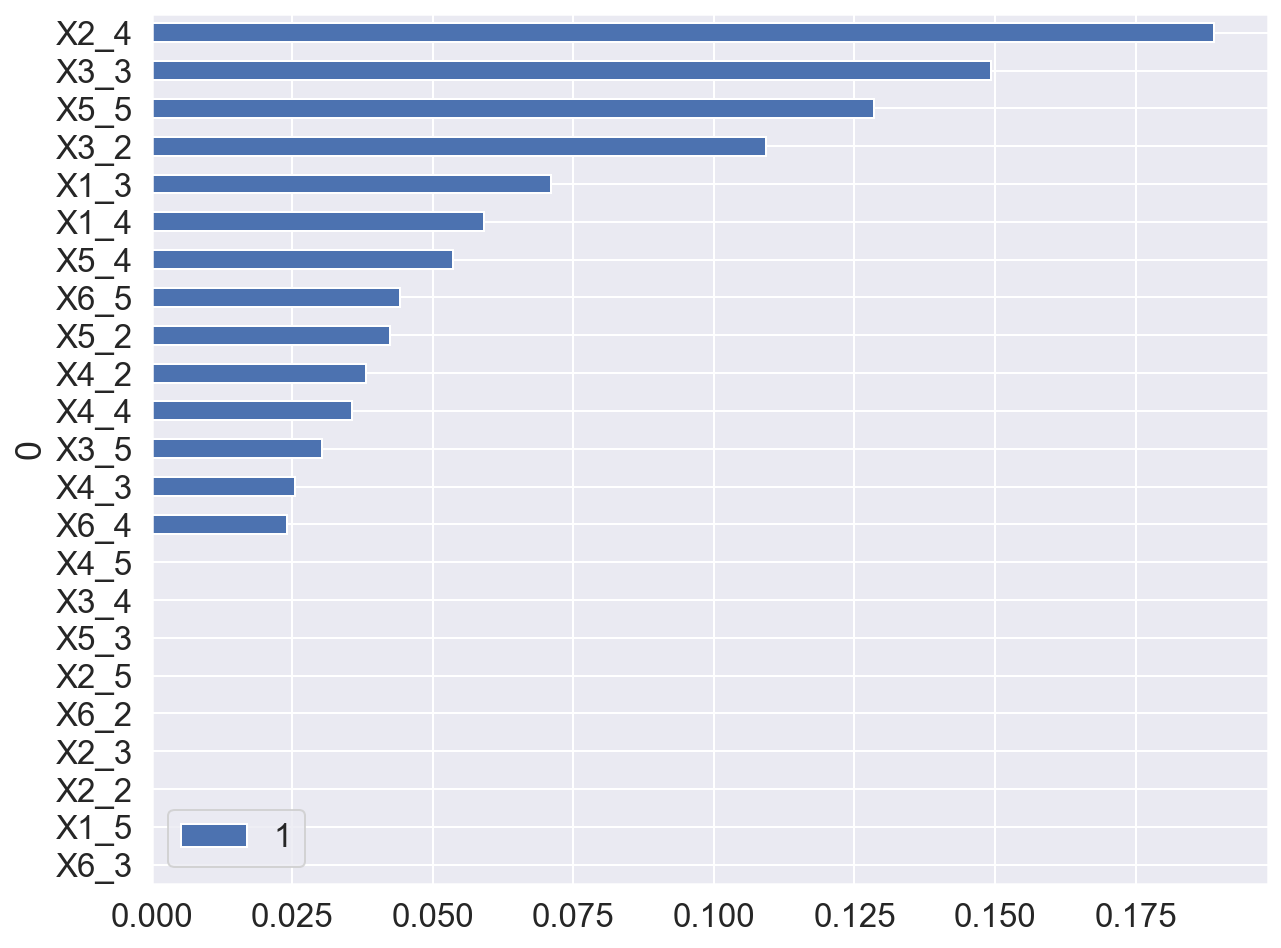

In [49]:
pd.DataFrame(list(zip(X_train.columns, Gboost.feature_importances_))
            ).sort_values(by=1, ascending=True
                         ).plot(kind='barh', x=0, y=1, figsize=(10,8))
plt.show()

In [50]:
predictions6_train = Gboost.predict(X_train)
predictions6_test = Gboost.predict(X_test)

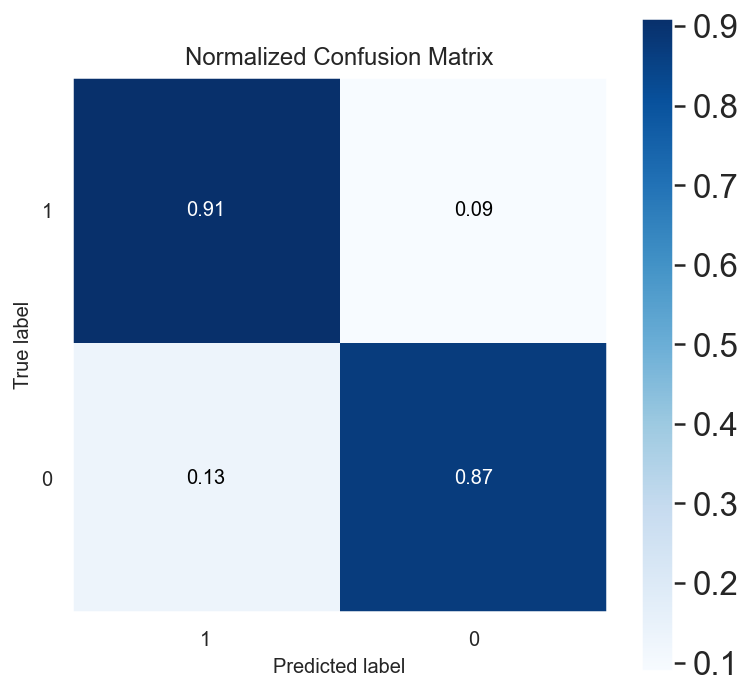

In [51]:
skplt.metrics.plot_confusion_matrix(y_train, predictions6_train, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

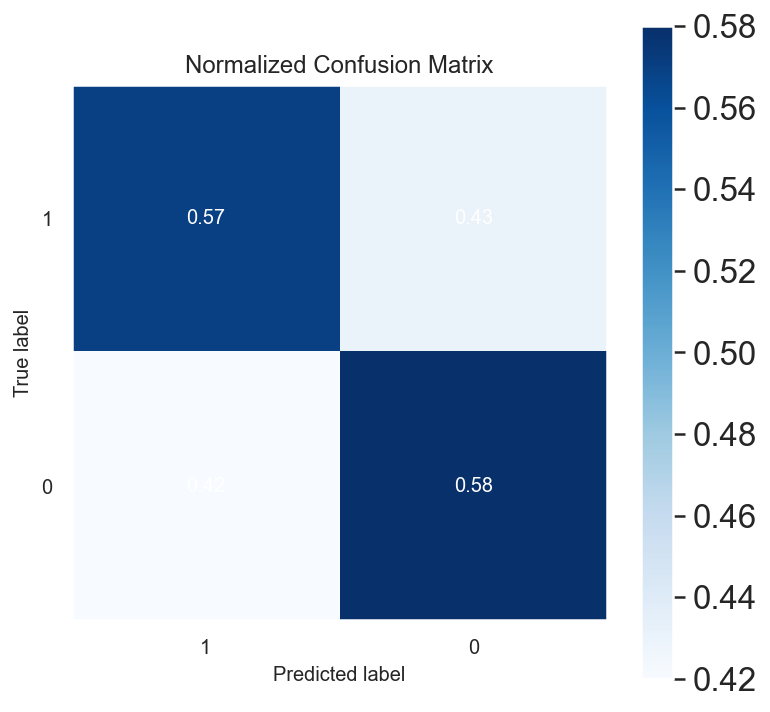

In [52]:
skplt.metrics.plot_confusion_matrix(y_test, predictions6_test, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

In [53]:
print(classification_report(y_train, predictions6_train))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        45
           1       0.89      0.91      0.90        55

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [54]:
print(classification_report(y_test, predictions6_test))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.62      0.57      0.59        14

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.58      0.58      0.58        26



## Summary of Results - Decision Tree With Gradient Boosting Model

The Decision Tree with Gradient boosting model achieved a performance above baseline (55%) on both the training (89%) and test (58%) scores.

The classification matrix shows that the accuracy achieved for this model as follows:
* Training sample - 89%
* Test sample - 58%

For this model the test set has performed considerably worse than the training set which is an indication that overfittting occurred in training the model.

The test sample achieved accuracy levels below the target of 73% and so this model would not be selected.



# Random Forest Model

In [55]:
RF1 = RandomForestClassifier()

In [56]:
def do_cross_val(RF1, X_train, y_train, cv=5):
    scores = cross_val_score(RF1, X_train, y_train, cv=cv, n_jobs=1,
                             scoring='neg_mean_squared_error')
    # , scores.std()#, cross_val_score(model, X, y, cv=cv, n_jobs=1).mean()
    return -scores.mean()

values = sorted(
    list(set(np.logspace(0, 3, num=20, endpoint=True, base=10.0).astype(int))))

In [57]:
# Grid Search
params = {'max_depth': [1, 2, 3, 4, 5, 6, 10, 20],
          # , 'max_features':[1,2,3,4],
          'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 20],
          'min_samples_leaf': [1, 2, 3, 4,10]
          # 'min_samples_split':[1,2,3,4]
          }

gs1 = GridSearchCV(RF1, param_grid=params, cv=5)
gs1.fit(X_train, y_train)

RF_best = gs1.best_estimator_
print(gs1.best_estimator_)
print('R2 training: ', gs1.score(X_train, y_train))
print('R2 CV training: ', gs1.best_score_)
print('R2 test: ', gs1.score(X_test, y_test))

RandomForestClassifier(max_depth=3, max_leaf_nodes=5)
R2 training:  0.78
R2 CV training:  0.6599999999999999
R2 test:  0.6923076923076923


In [58]:
fi = pd.DataFrame({
    'feature': X.columns,
    'importance': RF_best.feature_importances_
})

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
9,X3_4,0.090382
2,X1_5,0.086622
18,X5_5,0.084648
8,X3_3,0.074908
11,X4_2,0.067147
1,X1_4,0.063874
13,X4_4,0.051531
16,X5_3,0.050815
14,X4_5,0.047077
3,X2_2,0.044329


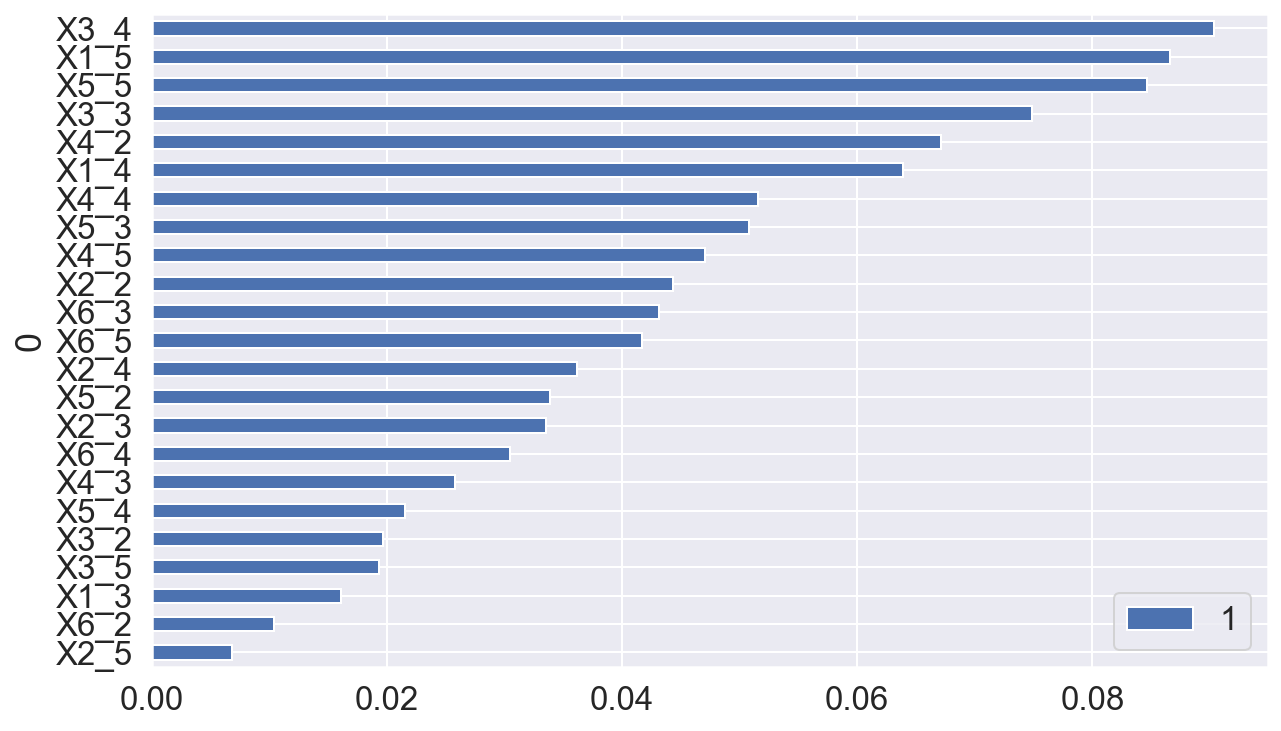

In [59]:
pd.DataFrame(list(zip(X_train.columns, RF_best.feature_importances_))
            ).sort_values(by=1, ascending=True
                         ).plot(kind='barh', x=0, y=1, figsize=(10, 6))
plt.show()

In [60]:
predictions2_train = gs1.predict(X_train)
predictions2_test = gs1.predict(X_test)

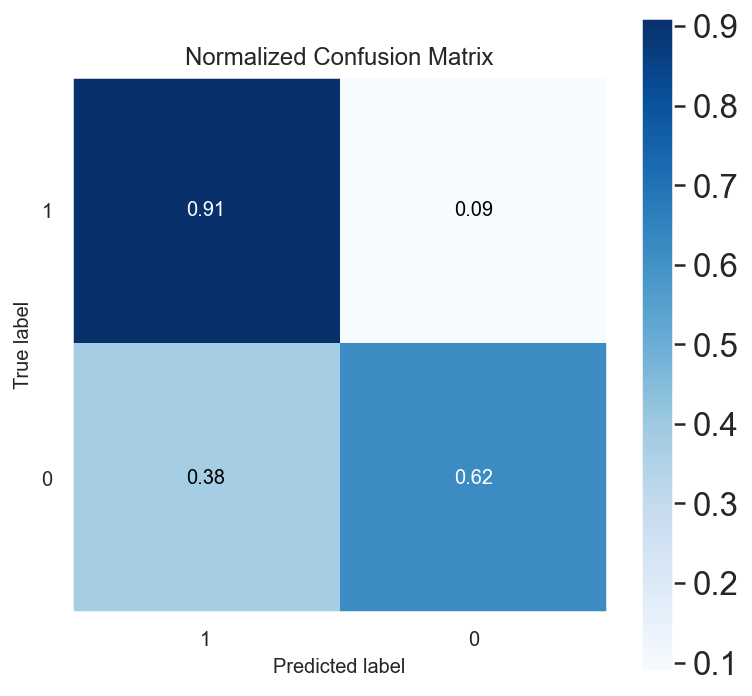

In [61]:
skplt.metrics.plot_confusion_matrix(y_train, predictions2_train, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

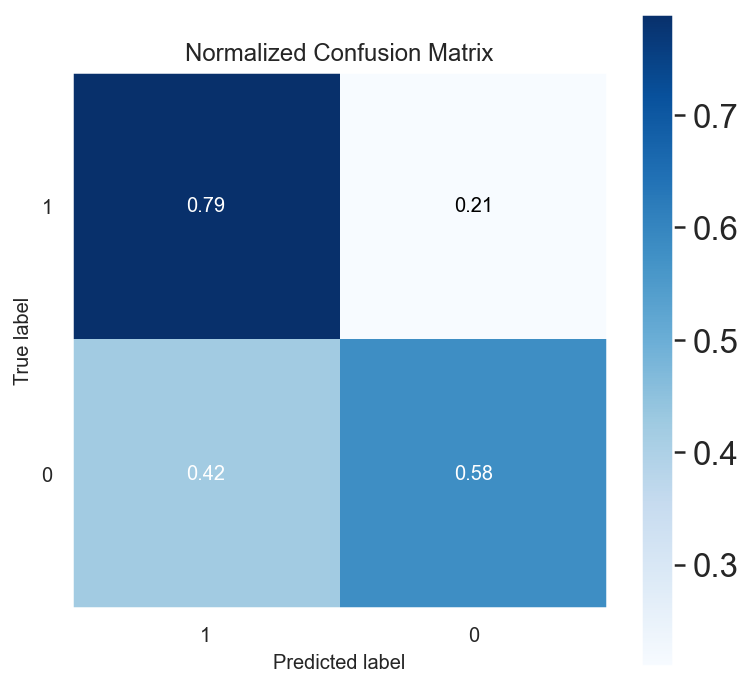

In [62]:
skplt.metrics.plot_confusion_matrix(y_test, predictions2_test, labels=[1, 0], figsize=(6, 6), normalize='all')
plt.show()

In [63]:
print(classification_report(y_train, predictions2_train))

              precision    recall  f1-score   support

           0       0.85      0.62      0.72        45
           1       0.75      0.91      0.82        55

    accuracy                           0.78       100
   macro avg       0.80      0.77      0.77       100
weighted avg       0.79      0.78      0.77       100



In [64]:
print(classification_report(y_test, predictions2_test))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.69      0.79      0.73        14

    accuracy                           0.69        26
   macro avg       0.69      0.68      0.68        26
weighted avg       0.69      0.69      0.69        26



# Summary of Results - Random Forest Model

The Random Forrest model achieved a performance above baseline (55%) on both the training (78%) and test (69%) scores.

The accuracy achieved for this model was:
* Training sample - 78%
* Test sample - 69%

For this model the test set has performed considerably worse than the training set which is an indication that overfittting has occurred in training the model.

The test sample achieved accuracy levels below the target of 73% and so this model would not be selected.


# Overall Summary of Results

The results from the models are summarised below:
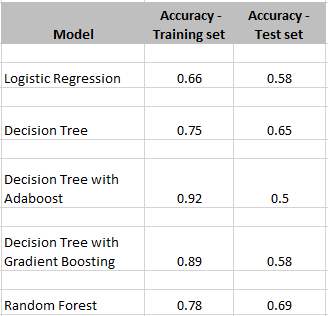

From the summary, we can see that the Logistic regression, Decision Tree, Decision Tree with Adaboost,Decision Tree with Gradient boosting and Random Forest models all achieved accuracy levels below the target level of 73% on the test set.

The models all performed considerably worse on the test set when compared to the teraining set, indicating that overfitting occurred on all the models.

In order to improve the accuracy of the model whilst reducing the level of overfitting in the model, feature selection will be carried out.



# Further Work carried out on the models

As the models did not achieve the desired accuracy, the next step was to determine whether there were any features that could be eliminated to develop the predictive model and as a result improve the performance of the model.

As both the input and target variables are categorical in nature, the Chi Squared test was selected as the basis to use to select the features that would be used in the modelling process. In this case the features with the higher Chi squared values are deemed to be the most significant in determining the predictive power of the model.

# Feature Selection - Categorical Input and Target Variables

There are two popular feature selection techniques that can be used for categorical input data and a categorical (class) target variable.

They are:

* Chi-Squared Statistic.
* Mutual Information Statistic.

The Chi-squared test will be selected for use.

Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables.
The results of this test will be used for feature selection, where the features that are independent of the target variable will be removed from the dataset.

The models will then be ran using the new dataset to determine the accuracy that the model can achieve and the best performing model.

# Chi-Squared Feature Selection

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [66]:
# split into input (X) and output (y) variables
df1 = survey.copy()
y = df1.pop('Y')
X = df1


In [67]:
survey1 = SelectKBest(score_func=chi2,  k = 'all')

In [68]:
fited_survey1 = survey1.fit(X, y)

In [69]:
## Chi squared values.
## The higher the value, the more important is the feature.
list(fited_survey1.scores_)  

[1.4490406618553018,
 0.036161345164738116,
 0.9001037156544756,
 0.10619400380095378,
 2.2732862401751053,
 0.5410703917483495]

In [70]:
## Creating a dataframe and sorting Chi squared values in terms of feature importance
survey_feature_importance = pd.DataFrame({'Features': X.columns, 'Importance' :list(fited_survey1.scores_) })
survey_feature_importance.sort_values(['Importance'] , ascending = False)

,Features,Importance
4,X5,2.273286
0,X1,1.449041
2,X3,0.900104
5,X6,0.541070
3,X4,0.106194
1,X2,0.036161


The Chi Squared test above indicates that the features or questions X2 and X4 are the least important questions / features. 
These features will be dropped due to the low Chi squared values and the models will then be ran using the new dataset to determine the accuracy that the models can achieve and the best performing model.

In [71]:
# Preparing the data set to remove features of least importance X2 and X4.
df2 = survey.copy()

# Remove columns X2 and X4 as these are the least important features
df2.drop(columns=['X2','X4'], inplace=True)
df2

,Y,X1,X3,X5,X6
0,0,3,3,2,4
1,0,3,3,4,3
2,1,5,3,3,5
3,0,5,3,3,5
4,0,5,3,3,5
...,...,...,...,...,...
121,1,5,3,4,3
122,1,5,3,2,5
123,1,5,3,4,5
124,0,4,3,4,5


In [72]:
# Get X and y data 
#Dummifying the predictor variables identified as classification variables.

df = survey.copy()
y1 = df2.pop('Y')
X1 = df2
X1 = pd.get_dummies(X1, columns=['X1', 'X3', 'X5', 'X6'], drop_first=True)

In [73]:
# Check shape of X 
X1.shape

(126, 15)

In [74]:
# split data between test and training data , standardising the data 

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,
                        stratify=y1, test_size=0.2, random_state=1)
scaler = StandardScaler()

X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)


X1_train = pd.DataFrame(X1_train, columns=X1.columns)
X1_test = pd.DataFrame(X1_test, columns=X1.columns)
X1_train.head()

,X1_3,X1_4,X1_5,X3_2,X3_3,X3_4,X3_5,X5_2,X5_3,X5_4,X5_5,X6_2,X6_3,X6_4,X6_5
0,-0.420084,1.527525,-1.083473,-0.333333,1.175139,-0.592749,-0.436436,2.708013,-0.515580,-0.733799,-0.608164,-0.100504,-0.420084,1.393261,-1.0
1,-0.420084,-0.654654,0.922958,-0.333333,-0.850963,1.687055,-0.436436,-0.369274,-0.515580,1.362770,-0.608164,-0.100504,2.380476,-0.717741,-1.0
2,-0.420084,-0.654654,0.922958,-0.333333,-0.850963,1.687055,-0.436436,-0.369274,-0.515580,1.362770,-0.608164,-0.100504,-0.420084,-0.717741,1.0
3,-0.420084,-0.654654,0.922958,-0.333333,-0.850963,1.687055,-0.436436,-0.369274,-0.515580,1.362770,-0.608164,-0.100504,-0.420084,-0.717741,1.0
4,-0.420084,1.527525,-1.083473,-0.333333,1.175139,-0.592749,-0.436436,-0.369274,1.939563,-0.733799,-0.608164,-0.100504,-0.420084,1.393261,-1.0


# Logistic Regression Model

In [75]:
model = LogisticRegression(max_iter=100000)

# setup the grid search
params = {'C': np.logspace(-4, 2, 10),
          'solver': ['liblinear'],
          'penalty': ['l2'],
          'fit_intercept': [True, False]}

lr_gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True,
                  n_jobs=-2)

lr_gs.fit(X1_train, y1_train)

# extract the grid search results
print('Best Parameters:')
print(lr_gs.best_params_)
print('Best estimator C:')
print(lr_gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(lr_gs.best_score_)
print('Best estimator score on the full training set:')
print(lr_gs.score(X1_train, y1_train))
print('Best estimator score on the test set:')
print(lr_gs.score(X1_test, y1_test))


Best Parameters:
{'C': 0.0001, 'fit_intercept': False, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator C:
0.0001
Best estimator mean cross validated training score:
0.6300000000000001
Best estimator score on the full training set:
0.64
Best estimator score on the test set:
0.6153846153846154


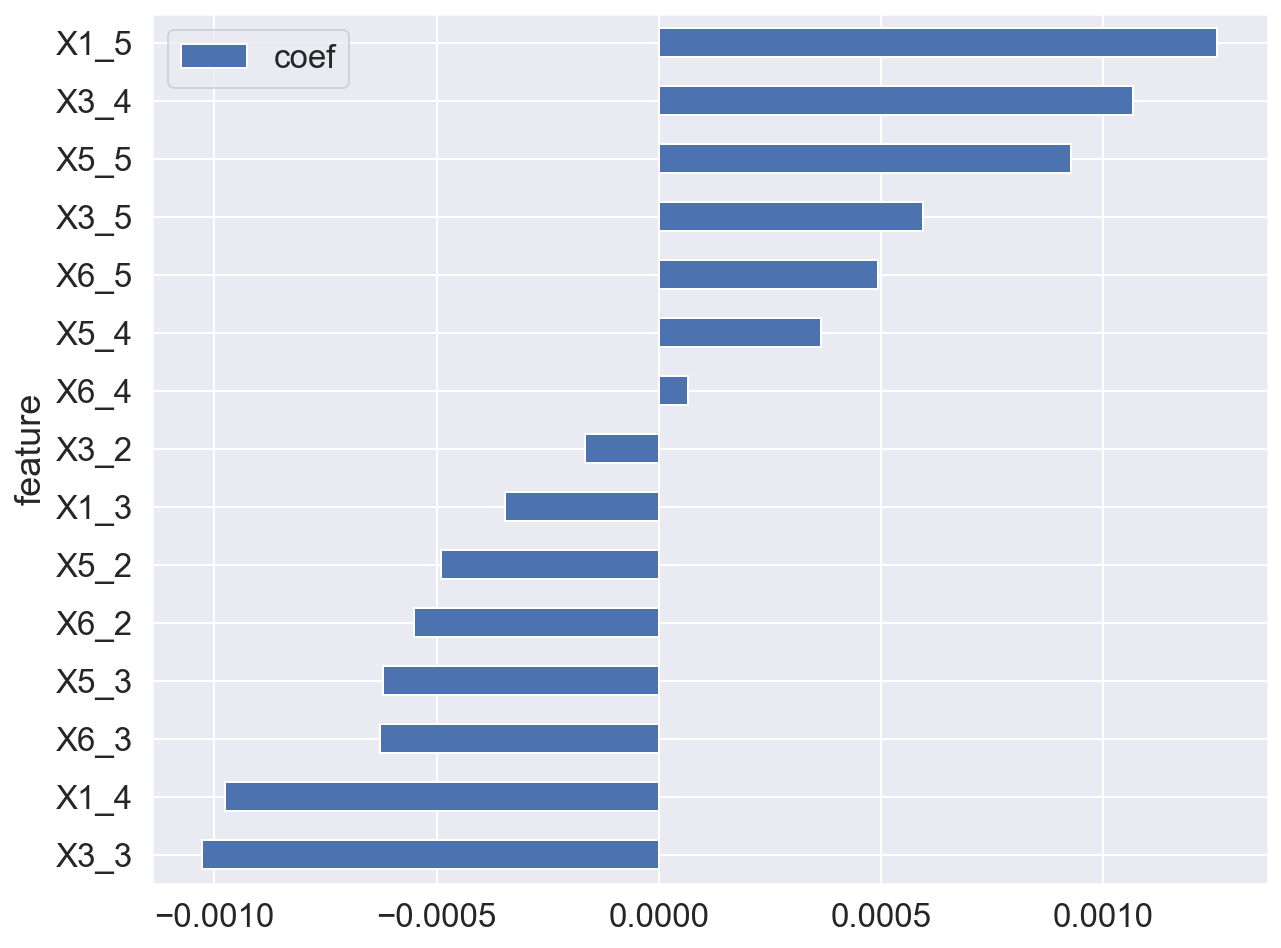

In [76]:
pd.DataFrame(list(zip(X1.columns, lr_gs.best_estimator_.coef_[0])), columns=['feature', 'coef']
            ).sort_values(by='coef'
                         ).plot(kind='barh', x='feature', y='coef', figsize=(10, 8))
plt.show()

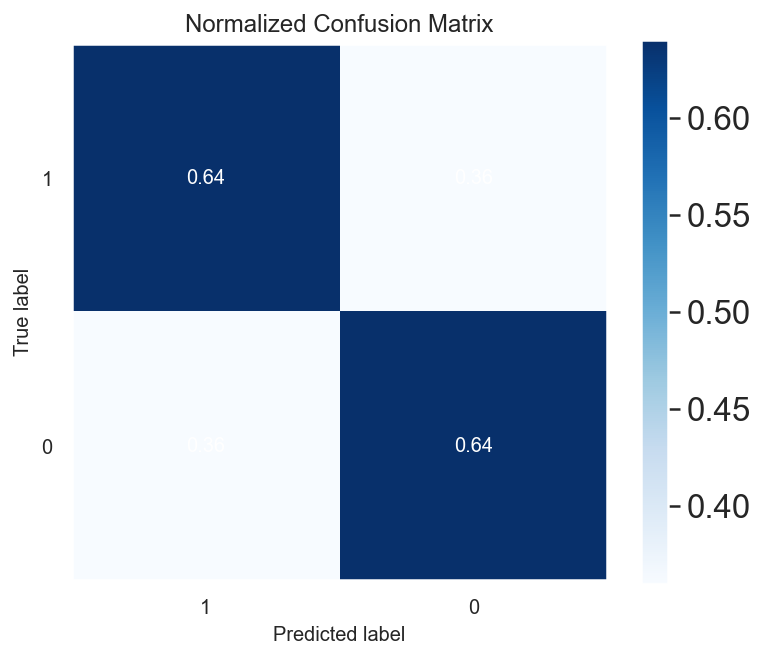

In [77]:
# Compute predictions and plot confusion matrix
predictions_train = lr_gs.predict(X1_train)

skplt.metrics.plot_confusion_matrix(y1_train, predictions_train, labels=[1, 0], figsize=(6,5), normalize='all')
plt.show()

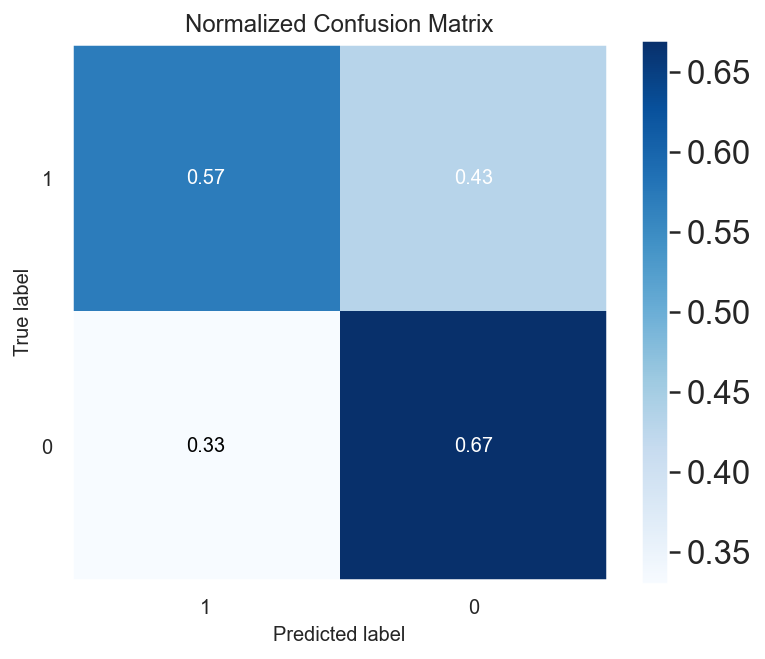

In [78]:
# Compute predictions and plot confusion matrix
predictions_test = lr_gs.predict(X1_test)

skplt.metrics.plot_confusion_matrix(y1_test, predictions_test, labels=[1, 0], figsize=(6,5), normalize='all')
plt.show()

In [79]:
print(classification_report(y1_train, predictions_train))

              precision    recall  f1-score   support

           0       0.59      0.64      0.62        45
           1       0.69      0.64      0.66        55

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.64      0.64      0.64       100



In [80]:
print(classification_report(y1_test, predictions_test))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.67      0.57      0.62        14

    accuracy                           0.62        26
   macro avg       0.62      0.62      0.62        26
weighted avg       0.62      0.62      0.62        26



# Summary of Results - Logistic regression Model

The logistic regression model achieved a performance above baseline (55%) on both the training (64%) and test (62%) scores.

The classification matrix shows that the accuracy achieved for this model as follows:

* Training sample - 64%
* Test sample - 62%

For this model the test set has performed slightly worse than the training set, however the test sample achieved accuracy levels below the target of 73% and so this model would not be selected.



# Decision Tree Model

In [81]:
DTree = DecisionTreeClassifier()

# gridsearch params
dtc1_params = {
              'max_depth': list(range(1, 13))+[None],
              'max_features': [None, 1, 2, 3],
              'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50],
              'ccp_alpha': [0, 0.001, 0.005, 0.01]
             }

# set the gridsearch
dtc_gs1 = GridSearchCV(DTree, dtc1_params, cv=5, verbose=1, n_jobs=-2)

# use the gridearch model to fit the data
dtc_gs1.fit(X1_train, y1_train)
dtc_best1 = dtc_gs1.best_estimator_
print("Best Params:", dtc_gs1.best_params_)
print("Best Score:", dtc_gs1.best_score_)
print("Training Score:",dtc_gs1.score(X1_train, y1_train))
print("Test Score:", dtc_gs1.score(X1_test, y1_test))

Fitting 5 folds for each of 2288 candidates, totalling 11440 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 4146 tasks      | elapsed:    4.6s


Best Params: {'ccp_alpha': 0.001, 'max_depth': 4, 'max_features': 1, 'min_samples_split': 3}
Best Score: 0.7
Training Score: 0.6
Test Score: 0.7307692307692307


[Parallel(n_jobs=-2)]: Done 11440 out of 11440 | elapsed:   15.1s finished


In [82]:
fi = pd.DataFrame({
    'feature': X1.columns,
    'importance': dtc_best1.feature_importances_
})

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
2,X1_5,0.236823
8,X5_3,0.189459
12,X6_3,0.151947
10,X5_5,0.123025
6,X3_5,0.094729
9,X5_4,0.094729
13,X6_4,0.047365
1,X1_4,0.046134
3,X3_2,0.015788
0,X1_3,0.000000


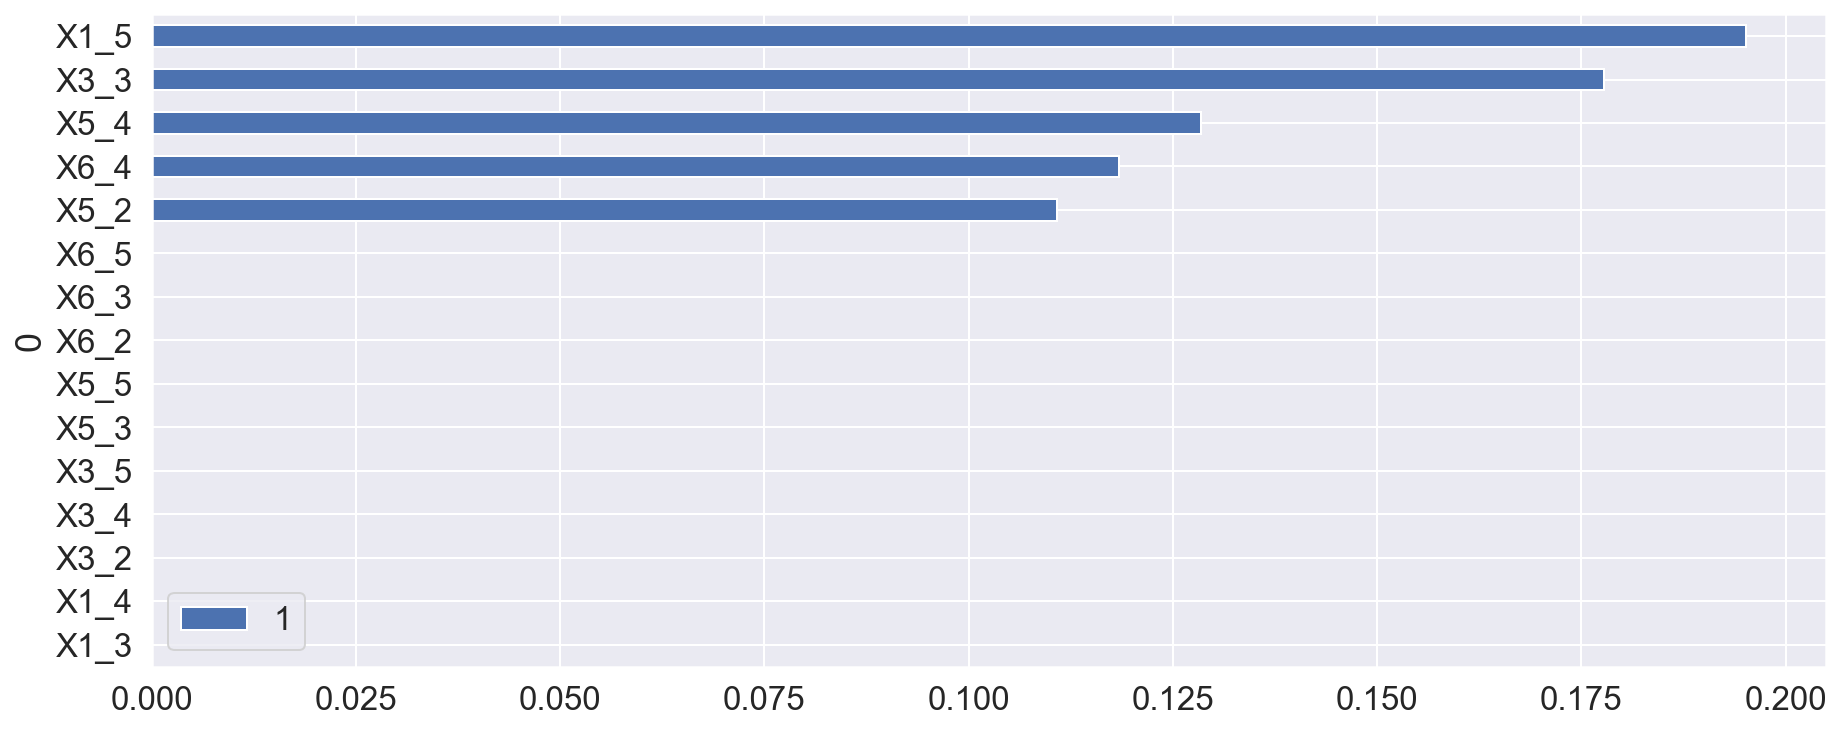

In [83]:
pd.DataFrame(list(zip(X1_train.columns, dtc_best.feature_importances_))
            ).sort_values(by=1, ascending=True
                         ).plot(kind='barh', x=0, y=1, figsize=(15, 6))
plt.show()

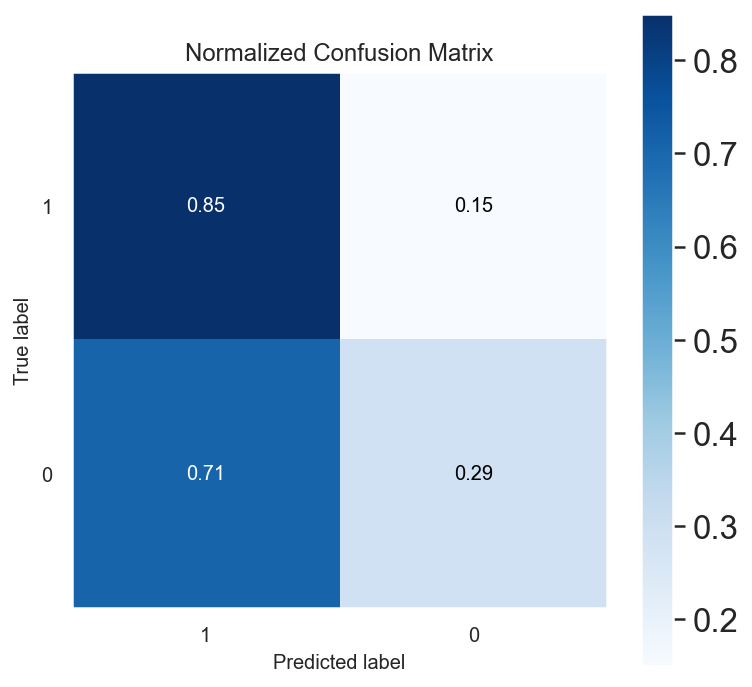

In [84]:
# Compute predictions and plot confusion matrix for training set
predictions_dtc_train = dtc_gs1.predict(X1_train)

skplt.metrics.plot_confusion_matrix(y1_train, predictions_dtc_train, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

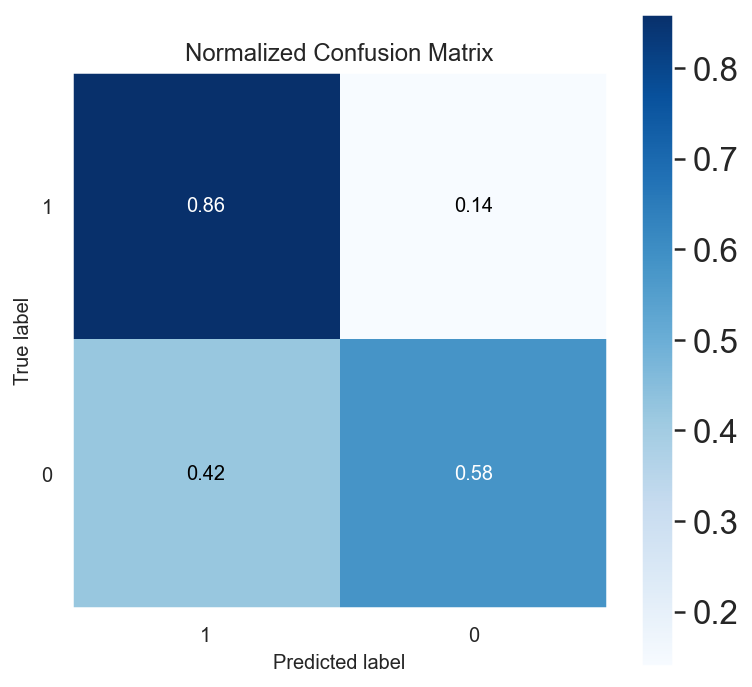

In [85]:
# Compute predictions and plot confusion matrix for test set
predictions_dtc_test = dtc_gs1.predict(X1_test)

skplt.metrics.plot_confusion_matrix(y1_test, predictions_dtc_test, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

In [86]:
print(classification_report(y1_train, predictions_dtc_train))

              precision    recall  f1-score   support

           0       0.62      0.29      0.39        45
           1       0.59      0.85      0.70        55

    accuracy                           0.60       100
   macro avg       0.61      0.57      0.55       100
weighted avg       0.61      0.60      0.56       100



In [87]:
print(classification_report(y1_test, predictions_dtc_test))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.71      0.86      0.77        14

    accuracy                           0.73        26
   macro avg       0.74      0.72      0.72        26
weighted avg       0.74      0.73      0.72        26



# Summary of Results - Decision Tree Model

The Decision Tree model achieved a performance above baseline (55%) on both the training (60%) and test (73%) scores.

The classification matrix shows that the accuracy achieved for this model as follows:

* Training sample - 60%
* Test sample - 73%

For this model the test set has performed slightly better than the training set which is an indication there is no overfittting in training the model.

**The test sample achieved accuracy levels in line with the target of 73% and so this model will be selected**.



# Decision Tree with Adaboost

In [88]:
base_estimator = DecisionTreeClassifier(max_depth=5)
Adaboost = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=10,
                           random_state=1, algorithm='SAMME')
Adaboost.fit(X1_train, y1_train)

print(Adaboost.score(X1_train, y1_train))
print(cross_val_score(Adaboost, X1_train, y1_train, cv=5).mean())
print(Adaboost.score(X1_test, y1_test))

0.81
0.5900000000000001
0.6538461538461539


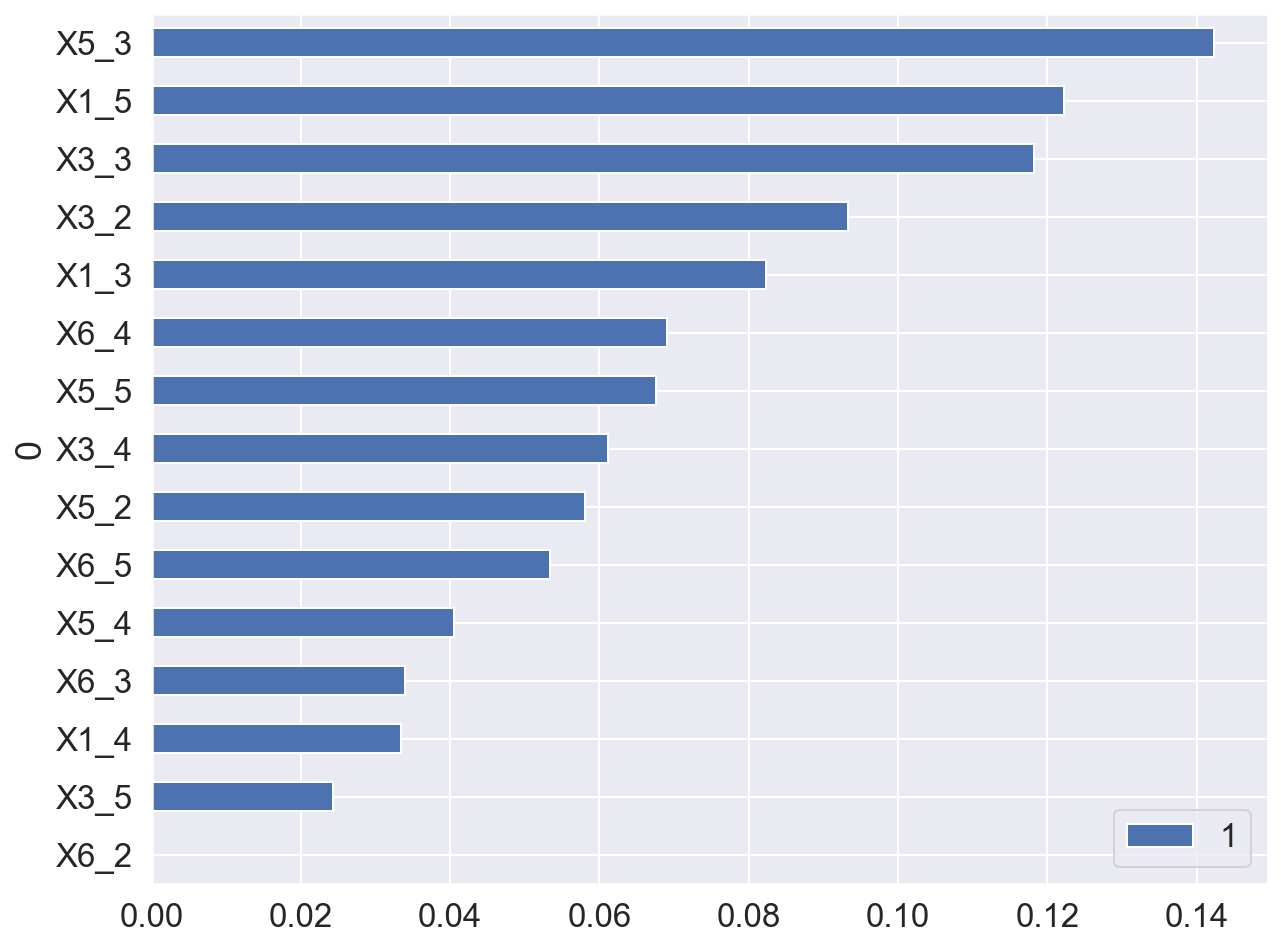

In [89]:
pd.DataFrame(list(zip(X1_train.columns, Adaboost.feature_importances_))
            ).sort_values(by=1, ascending=True
                         ).plot(kind='barh', x=0, y=1, figsize=(10,8))
plt.show()

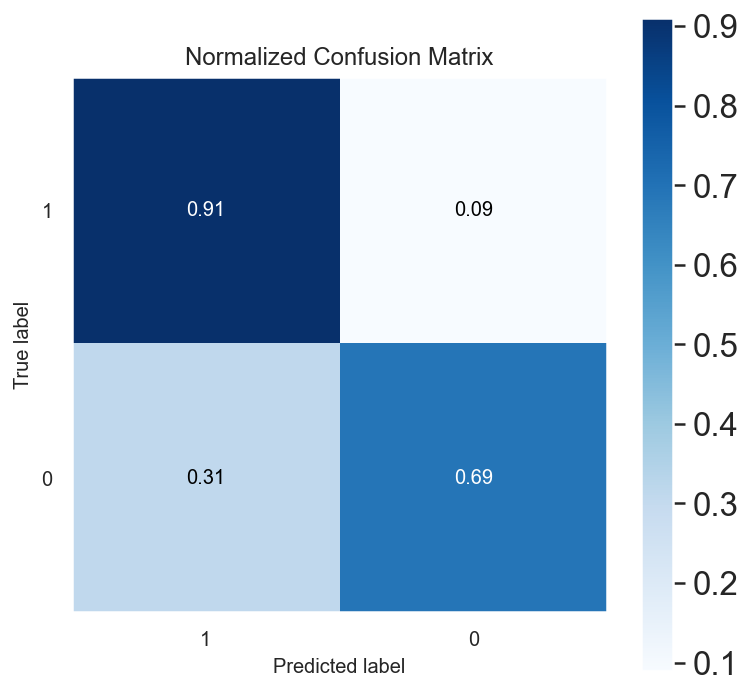

In [90]:
# Compute predictions and plot confusion matrix for training set
predictions_ab_train = Adaboost.predict(X1_train)

skplt.metrics.plot_confusion_matrix(y1_train, predictions_ab_train, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

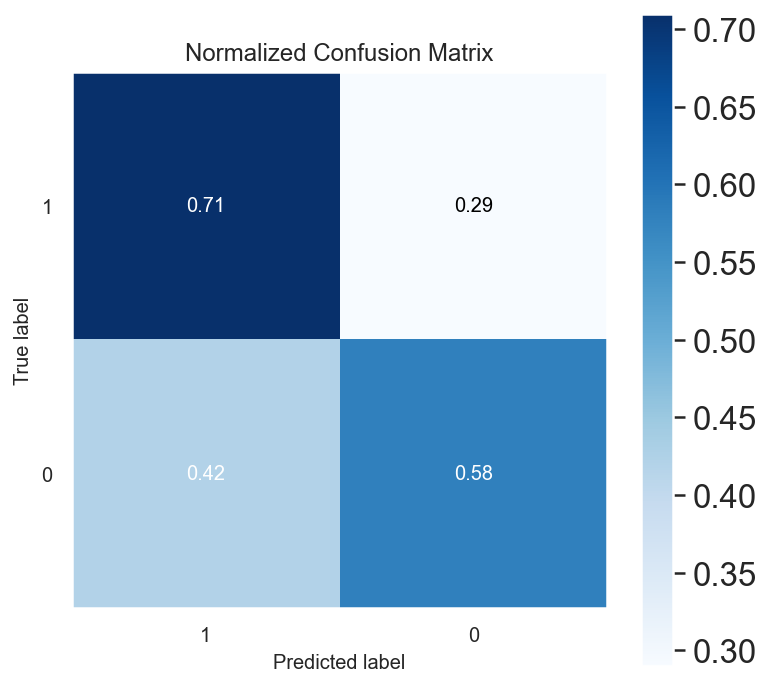

In [91]:
# Compute predictions and plot confusion matrix for test set
predictions_ab_test = Adaboost.predict(X1_test)

skplt.metrics.plot_confusion_matrix(y1_test, predictions_ab_test, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

In [92]:
print(classification_report(y1_train, predictions_ab_train))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77        45
           1       0.78      0.91      0.84        55

    accuracy                           0.81       100
   macro avg       0.82      0.80      0.80       100
weighted avg       0.82      0.81      0.81       100



In [93]:
print(classification_report(y1_test, predictions_ab_test))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.67      0.71      0.69        14

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.65      0.65      0.65        26



# Summary of Results - Decision Tree With Adaboost Model
The Decision Tree with Adaboost model achieved a performance above baseline (55%) on both the training (81%) and test (65%) scores.

The classification matrix shows that the accuracy achieved for this model as follows:

* Training sample - 81%
* Test sample - 65%

For this model the test set has performed considerably worse than the training set which is an indication that overfittting has occurred in training the model.

The test sample achieved accuracy levels below the target of 73% and so this model would not be selected.



# Decision Tree With Gradient Boosting

In [94]:
base_estimator = DecisionTreeClassifier(max_depth=5)
Gboost1 = GradientBoostingClassifier(n_estimators=10,
                           random_state=1, init=base_estimator)
Gboost1.fit(X1_train, y1_train)

print(Gboost1.score(X1_train, y1_train))
print(cross_val_score(Gboost1, X1_train, y1_train, cv=5).mean())
print(Gboost1.score(X1_test, y1_test))

0.8
0.54
0.6923076923076923


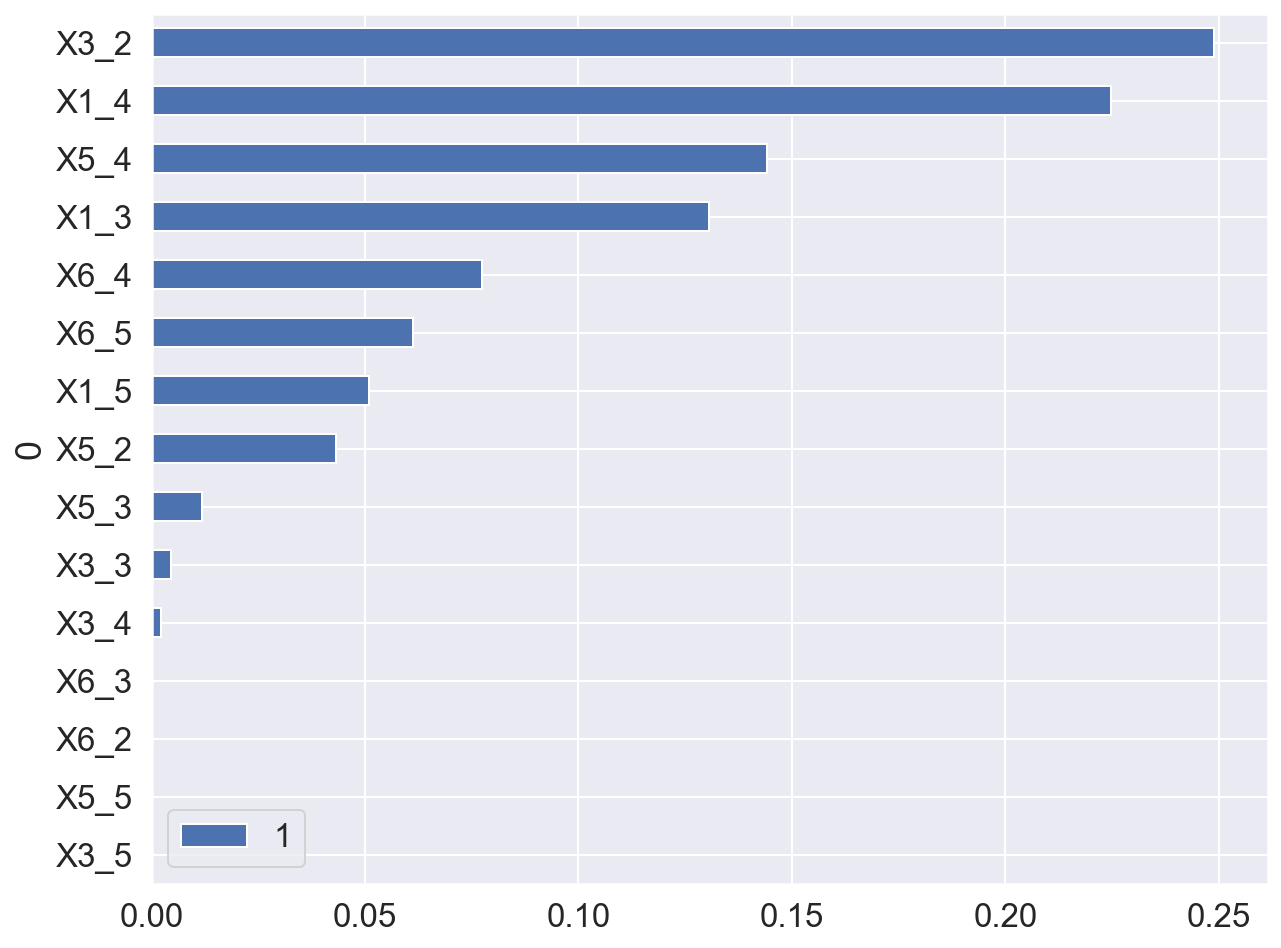

In [95]:
pd.DataFrame(list(zip(X1_train.columns, Gboost1.feature_importances_))
            ).sort_values(by=1, ascending=True
                         ).plot(kind='barh', x=0, y=1, figsize=(10,8))
plt.show()

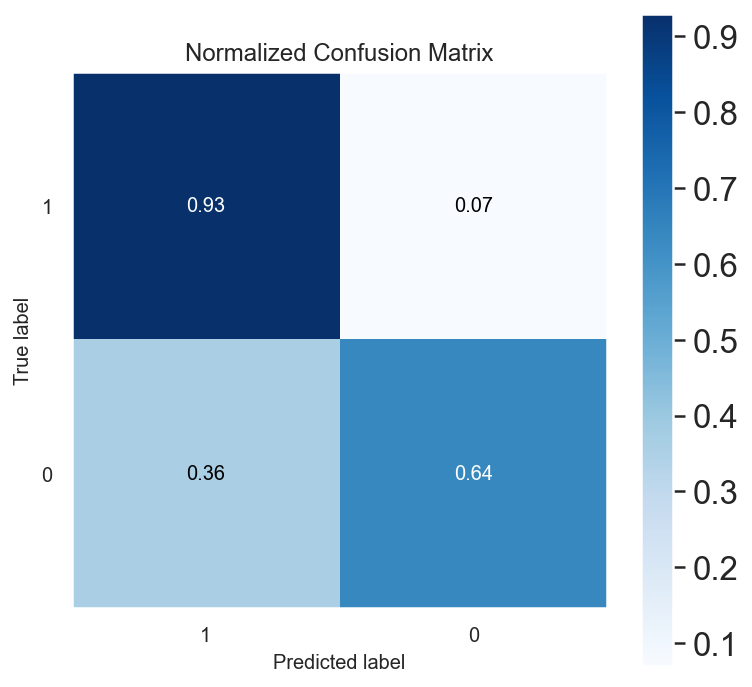

In [96]:
# Compute predictions and plot confusion matrix for training set
predictions_gb_train = Gboost1.predict(X1_train)

skplt.metrics.plot_confusion_matrix(y1_train, predictions_gb_train, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

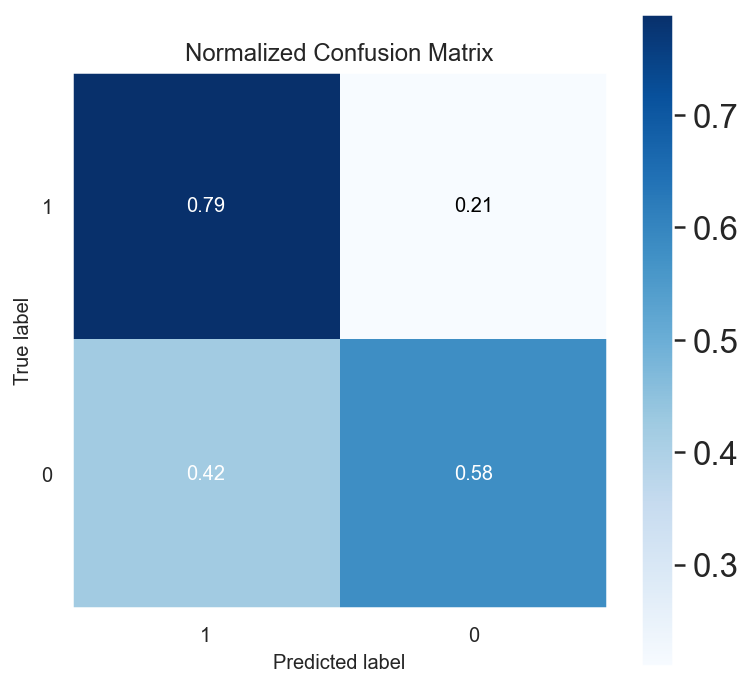

In [97]:
# Compute predictions and plot confusion matrix for test set
predictions_gb_test = Gboost1.predict(X1_test)

skplt.metrics.plot_confusion_matrix(y1_test, predictions_gb_test, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

In [98]:
print(classification_report(y1_train, predictions_gb_train))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        45
           1       0.76      0.93      0.84        55

    accuracy                           0.80       100
   macro avg       0.82      0.79      0.79       100
weighted avg       0.81      0.80      0.79       100



In [99]:
print(classification_report(y1_test, predictions_gb_test))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.69      0.79      0.73        14

    accuracy                           0.69        26
   macro avg       0.69      0.68      0.68        26
weighted avg       0.69      0.69      0.69        26



# Summary of Results - Decision Tree With Gradient Boosting Model
The Decision Tree with gradient boosting model achieved a performance above baseline (55%) on both the training (80%) and test (69%) scores.

The classification matrix shows that the accuracy achieved for this model as follows:

* Training sample - 80%
* Test sample - 69%

For this model the test set has performed considerably worse than the training set which is an indication that overfittting has occurred in training the model.

The test sample achieved accuracy levels below the target of 73% and so this model would not be selected.

# Random Forest Model

In [100]:
RF1 = RandomForestClassifier()

In [101]:
def do_cross_val(RF1, X1_train, y1_train, cv=5):
    scores = cross_val_score(RF1, X1_train, y1_train, cv=cv, n_jobs=1,
                             scoring='neg_mean_squared_error')
    # , scores.std()#, cross_val_score(model, X, y, cv=cv, n_jobs=1).mean()
    return -scores.mean()

values = sorted(
    list(set(np.logspace(0, 3, num=20, endpoint=True, base=10.0).astype(int))))

In [102]:
# Grid Search
params = {'max_depth': [1, 2, 3, 4, 5, 6, 10, 20],
          # , 'max_features':[1,2,3,4],
          'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 20],
          'min_samples_leaf': [1, 2, 3, 4,10]
          # 'min_samples_split':[1,2,3,4]
          }

rf = GridSearchCV(RF1, param_grid=params, cv=5)
rf.fit(X1_train, y1_train)

RF1_best = rf.best_estimator_
print(rf.best_estimator_)
print('Training: ', rf.score(X1_train, y1_train))
print('CV training: ', rf.best_score_)
print('Test: ', rf.score(X1_test, y1_test))

RandomForestClassifier(max_depth=2, max_leaf_nodes=9)
Training:  0.68
CV training:  0.64
Test:  0.6153846153846154


In [103]:
fi = pd.DataFrame({
    'feature': X1.columns,
    'importance': RF1_best.feature_importances_
})

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
2,X1_5,0.158590
5,X3_4,0.137689
10,X5_5,0.098047
1,X1_4,0.093903
4,X3_3,0.087402
8,X5_3,0.064824
12,X6_3,0.062539
0,X1_3,0.052925
7,X5_2,0.052675
9,X5_4,0.043317


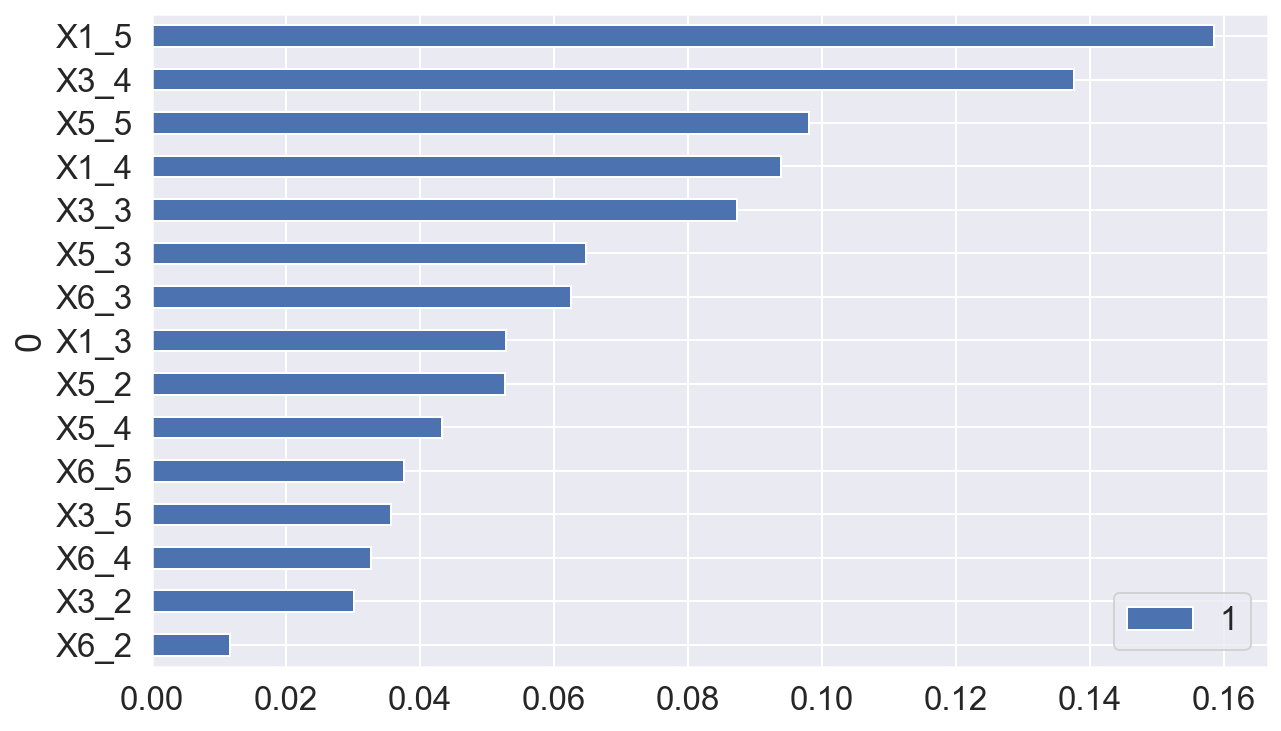

In [104]:
pd.DataFrame(list(zip(X1_train.columns, RF1_best.feature_importances_))
            ).sort_values(by=1, ascending=True
                         ).plot(kind='barh', x=0, y=1, figsize=(10, 6))
plt.show()

In [105]:
predictions_rf_train = rf.predict(X1_train)


In [106]:
predictions2_train = gs1.predict(X_train)
predictions2_test = gs1.predict(X_test)

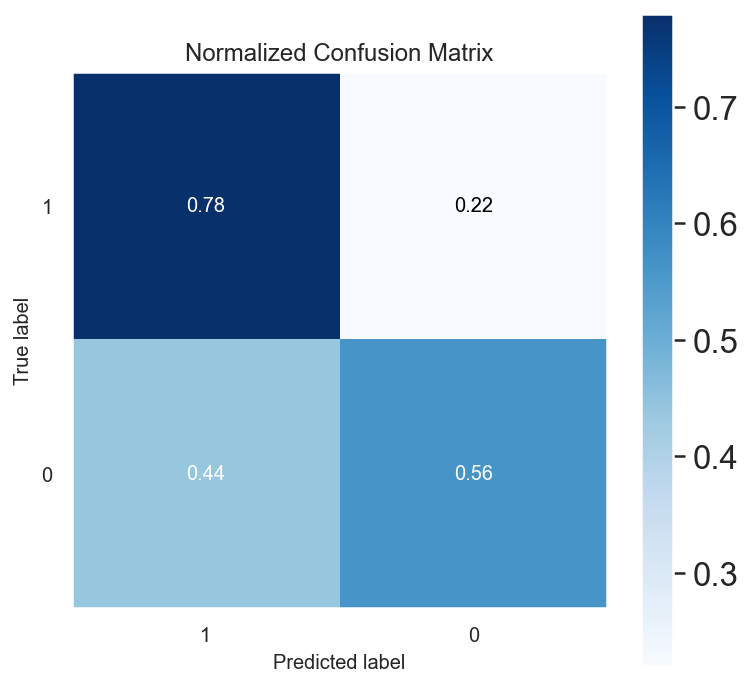

In [107]:
# Compute predictions and plot confusion matrix for training set
predictions_rf_train = rf.predict(X1_train)

skplt.metrics.plot_confusion_matrix(y1_train, predictions_rf_train, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

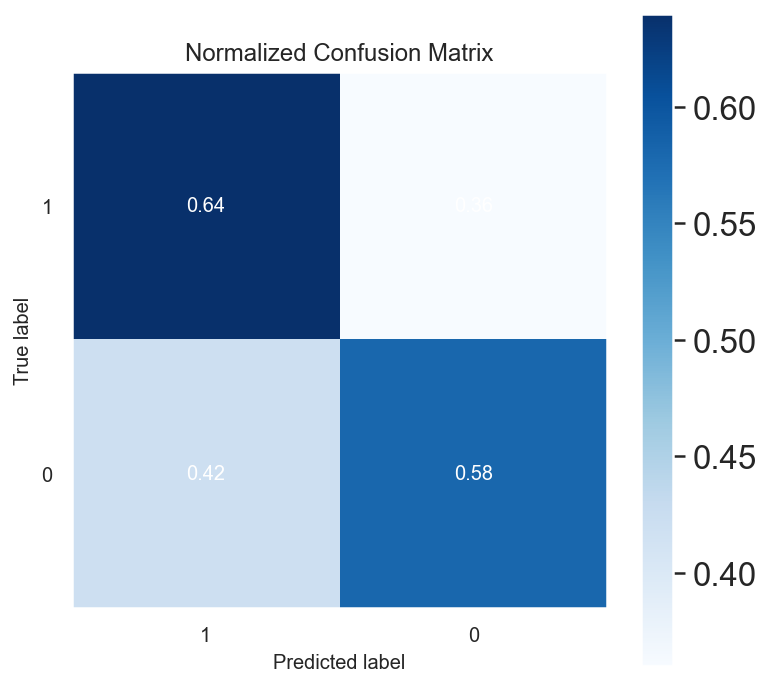

In [108]:
# Compute predictions and plot confusion matrix for test set
predictions_rf_test = rf.predict(X1_test)

skplt.metrics.plot_confusion_matrix(y1_test, predictions_rf_test, labels=[1, 0], figsize=(6,6), normalize='all')
plt.show()

In [109]:
print(classification_report(y1_train, predictions_rf_train))

              precision    recall  f1-score   support

           0       0.68      0.56      0.61        45
           1       0.68      0.78      0.73        55

    accuracy                           0.68       100
   macro avg       0.68      0.67      0.67       100
weighted avg       0.68      0.68      0.68       100



In [110]:
print(classification_report(y1_test, predictions_rf_test))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.64      0.64      0.64        14

    accuracy                           0.62        26
   macro avg       0.61      0.61      0.61        26
weighted avg       0.62      0.62      0.62        26



# Summary of Results - Random Forest Model

The Random Forrest model achieved a performance above baseline (55%) on both the training (68%) and test (62%) scores.

The accuracy achieved for this model was:
* Training sample - 68%
* Test sample - 62%

For this model the test set has performed worse than the training set which is an indication that overfittting has occurred in training the model.

The test sample achieved accuracy levels below the target of 73% and so this model would not be selected.


# Overall Summary of Results

The results from the models are summarised below:
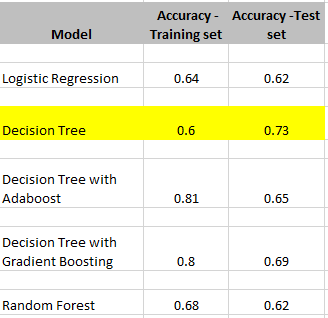

From the summary, we can see that **the Decision Tree Model achieved accuracy levels of 73% on the test set**.

The Logistic regression, Decision Tree with Adaboost, Decision Tree with Gradient boosting and Random Forest models all achieved accuracy scores below 73%, with Logistic regression and Random forest performing the worst with test score of 62%.

From the summary above, we can also see that the feature of least importance was X2 followed by X4 (as seen in the Chi squared test).
From this we can conclude that in the next survey the Question two (X2) and Question four (X4) could be left off the models as these questions are the least important in predicting the customers happiness in these models.
